# 한양대학교 수강신청 Log Data 분석

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.family'] = 'AppleGothic'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/var/folders/tk/c4xyv5k13cz_yzr9m9svmw540000gn/T/ipykernel_22260/2351316839.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## [Data load]

In [3]:
classes = pd.read_excel("./data/원본/과목별 2022년 1학기, 2학기 수강 편람.xlsx")
classes

,수업년도,수업번호,"학기(10:1학기, 20:2학기)",분반번호,locale,반소속코드,반소속명,학년,반번호,학수번호,...,특수수업구분,이론/실습구분,수강/정원,이수제한여부,"집중강의여부(0:집중수업아님, 1:집중수업임)",명품강의여부,베스트티쳐여부,이전과목명,이수단위,핵심역량
0,2022,10002,10,0,KO,H0002517,건설환경공학과,4,1.0,CIE4009,...,NaN,이론,26/32,O,0.0,0.0,0.0,NaN,400단위,NaN
1,2022,10003,10,0,KO,H0002517,건설환경공학과,4,1.0,CIE4032,...,NaN,이론/실습,33/36,O,0.0,0.0,0.0,NaN,400단위,NaN
2,2022,10004,10,0,KO,H0002517,건설환경공학과,4,1.0,CIE4044,...,NaN,이론,13/20,O,0.0,0.0,0.0,NaN,400단위,NaN
3,2022,10005,10,0,KO,H0002517,건설환경공학과,4,1.0,CIE4047,...,NaN,이론,43/50,O,0.0,0.0,0.0,NaN,400단위,NaN
4,2022,10006,10,0,KO,H0002517,건설환경공학과,4,1.0,CIE4062,...,IC-PBL,이론,22/25,O,0.0,0.0,0.0,환경복원공학,400단위,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050,2022,15489,20,0,KO,H0002256,서울 대학,0,NaN,GEN9002,...,NaN,이론,12/15,NaN,1.0,0.0,0.0,NaN,100단위,NaN
10051,2022,15490,20,0,KO,H0002256,서울 대학,0,NaN,GEN9002,...,NaN,이론,12/15,NaN,1.0,0.0,0.0,NaN,100단위,NaN
10052,2022,15490,20,0,KO,H0002256,서울 대학,0,NaN,GEN9002,...,NaN,이론,12/15,NaN,1.0,0.0,0.0,NaN,100단위,NaN
10053,2022,15492,20,0,KO,H0002256,서울 대학,0,NaN,GEN4075,...,NaN,이론,16/60,NaN,0.0,0.0,0.0,생태계와과학비하인드스토리,100단위,"지식,비판적사고,나눔"


In [4]:
hope = pd.read_excel("./data/원본/과목별 2022년 1학기, 2학기 수강 희망인원.xlsx")
hope

,수업년도,수업학기,수업번호,설강대학,설강전공,이수구분명,학수번호,과목명,이수학년,이수학기,...,관장대학,관장전공,제한인원,신청인원,다중전공배당인원,증원인원,특수수업구분명,희망수업등록,설강학과주전공수,설강학과다중전공
0,2022,10,10002,공과대학(H0002449),건설환경공학과(H0002517),전공심화,CIE4009,기초공학,4,10,...,공과대학(H0002449),건설환경공학과(H0002517),32,26,1,0,NaN,39,25,0
1,2022,10,10003,공과대학(H0002449),건설환경공학과(H0002517),전공심화,CIE4032,건설관리,4,10,...,공과대학(H0002449),건설환경공학과(H0002517),36,33,1,0,NaN,45,33,0
2,2022,10,10004,공과대학(H0002449),건설환경공학과(H0002517),전공심화,CIE4044,강구조설계,4,10,...,공과대학(H0002449),건설환경공학과(H0002517),20,13,1,0,NaN,19,13,0
3,2022,10,10005,공과대학(H0002449),건설환경공학과(H0002517),전공심화,CIE4047,수공구조물설계,4,10,...,공과대학(H0002449),건설환경공학과(H0002517),50,43,2,0,NaN,50,42,0
4,2022,10,10006,공과대학(H0002449),건설환경공학과(H0002517),전공심화,CIE4062,환경정화공학,4,10,...,공과대학(H0002449),건설환경공학과(H0002517),25,22,1,0,IC-PBL,29,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,2022,20,19050,의과대학(H0002589),의학과(H0002601),전공핵심,MED2090,노화,2,20,...,의과대학(H0002589),의학과(H0002601),114,111,0,0,대단위,0,111,0
5419,2022,20,19051,의과대학(H0002589),의학과(H0002601),전공핵심,MED2092,환자.의사.사회3,2,20,...,의과대학(H0002589),의학과(H0002601),114,111,0,0,대단위,0,111,0
5420,2022,20,19052,의과대학(H0002589),의학과(H0002601),전공핵심,MED2093,제2시기종합평가,2,20,...,의과대학(H0002589),의학과(H0002601),114,111,0,0,대단위,0,111,0
5421,2022,20,19053,의과대학(H0002589),의학과(H0002601),전공핵심,MED2094,의학연구프로젝트2,2,20,...,의과대학(H0002589),의학과(H0002601),114,2,0,0,NaN,1,1,0


In [5]:
scores = pd.read_excel("./data/원본/과목별 3년치 상세정보.xlsx")
scores

,수업년도,수업학기,수업번호,설강대학,설강소속,관장대학,관장소속,학수번호,과목명,설강기준평점,...,A0,B+,B0,C+,C0,D+,D0,Pass,F,전체인원
0,2022,10,10002,공과대학,건설환경공학과,공과대학,건설환경공학과,CIE4009,기초공학,3.67,...,24,20,12,10,3,2,2,0,1,114
1,2022,10,10003,공과대학,건설환경공학과,공과대학,건설환경공학과,CIE4032,건설관리,3.64,...,16,30,15,12,3,0,0,0,1,112
2,2022,10,10004,공과대학,건설환경공학과,공과대학,건설환경공학과,CIE4044,강구조설계,3.46,...,13,22,13,6,0,0,1,0,2,70
3,2022,10,10005,공과대학,건설환경공학과,공과대학,건설환경공학과,CIE4047,수공구조물설계,3.41,...,32,56,40,27,0,0,0,0,2,179
4,2022,10,10006,공과대학,건설환경공학과,공과대학,건설환경공학과,CIE4062,환경정화공학,3.99,...,25,5,3,4,0,0,0,0,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,2022,20,19050,의과대학,의학과,의과대학,의학과,MED2090,노화,3.74,...,96,97,58,11,10,7,2,0,0,322
5419,2022,20,19051,의과대학,의학과,의과대학,의학과,MED2092,환자.의사.사회3,3.35,...,52,63,83,45,45,4,0,0,0,322
5420,2022,20,19052,의과대학,의학과,의과대학,의학과,MED2093,제2시기종합평가,3.36,...,51,56,68,68,24,11,5,0,0,322
5421,2022,20,19053,의과대학,의학과,의과대학,의학과,MED2094,의학연구프로젝트2,4.33,...,1,0,0,0,0,0,0,0,0,3


In [6]:
majors = pd.read_excel("./data/원본/과목별 수강생 신청 학과.xlsx")
majors

,수업년도,수업학기,수업번호,학수번호,과목명,희망신청소속,학생수
0,2022,10,10002,CIE4009,기초공학,건설환경공학과,33
1,2022,10,10002,CIE4009,기초공학,경제금융학부,1
2,2022,10,10002,CIE4009,기초공학,울산대학교,1
3,2022,10,10002,CIE4009,기초공학,정책학과,1
4,2022,10,10002,CIE4009,기초공학,정치외교학과,1
...,...,...,...,...,...,...,...
46861,2022,20,33580,ECE8094,보안SoC설계,융합전자공학부,2
46862,2022,20,33596,EWE8066,집적회로소자,융합전자공학부,3
46863,2022,20,33701,GCE0004,기후변화협상전략,국제학부,1
46864,2022,20,33702,GCE0013,자원경제학,국제학부,1


In [7]:
log = pd.read_excel("./data/원본/학생별 신청 로그.xlsx")
log

,수업년도,수업학기,학번(암호화),학생소속대학,학생소속,순번,수업번호,학수번호,이수구분,과목명,재수강여부,신청일자,취소여부,취소일자
0,2022,10,MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41kl...,사회과학대학,정치외교학과,1,15414,SYH0004,교양필수,사랑의실천4(미래실용인재),0,2022-02-04 11:36:44.235867,신청,NaN
1,2022,10,MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41kl...,사회과학대학,정치외교학과,2,10556,PSD4057,전공심화,아프리카와지역통합,0,2022-02-04 11:36:46.634902,신청,NaN
2,2022,10,MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41kl...,사회과학대학,정치외교학과,3,10555,PSD4027,전공심화,세계화와법,0,2022-02-04 11:36:50.471731,신청,NaN
3,2022,10,MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41kl...,사회과학대학,정치외교학과,4,15452,SYB1128,핵심교양,저작권과스마트폰의이해,0,2022-02-04 11:44:30.715142,취소,2022-02-04 11:45:01.376604
4,2022,10,MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41kl...,사회과학대학,정치외교학과,5,15467,SYB9030,핵심교양,그린IT의이해,0,2022-02-04 11:46:12.414932,취소,2022-03-07 16:30:36.876758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288382,2022,20,MC0GCCqGSIb3DQIJAyEAHTykSWRf+l894eyotjmt1CE7hK...,국제학부,국제학부,4,12510,VEN2019,타전공(일반)선택,한국문화와한류,0,2022-09-07 17:01:05.971433,신청,NaN
288383,2022,20,MC0GCCqGSIb3DQIJAyEAHTykSWRf+l894eyotjmt1CE7hK...,국제학부,국제학부,5,15202,CUL1189,핵심교양,Contemporary Korean Studies,0,2022-09-07 17:01:30.048762,신청,NaN
288384,2022,20,MC0GCCqGSIb3DQIJAyEAHTykSWRf+l894eyotjmt1CE7hK...,국제학부,국제학부,6,12045,PSD3056,타전공(일반)선택,시민사회와사회운동,0,2022-09-07 17:01:51.479879,신청,NaN
288385,2022,20,MC0GCCqGSIb3DQIJAyEAMHHSXzyNSinSpAJlsNhh/dnOuH...,학점교류대학,고려대학교,1,10010,FET4001,타전공(일반)선택,에너지신산업이슈연구,0,2022-08-11 16:28:40.799946,신청,NaN


In [8]:
graduates = pd.read_excel("./data/원본/학생별 졸업 사정 조회.xlsx")
graduates

,학번(암호화),전공구분,소속대학,소속명,학년,전공구분명,이수코드,이수명,기준,이수
0,MC0GCCqGSIb3DQIJAyEAW9YAs1Xu7v0XM888EIDwCvyeRp...,J11,사회과학대학,관광학,3,주전공(제1전공),1,졸업학점,126.0,94.00
1,MC0GCCqGSIb3DQIJAyEAW9YAs1Xu7v0XM888EIDwCvyeRp...,J11,사회과학대학,관광학,3,주전공(제1전공),12,선수강이수여부,1.0,1.00
2,MC0GCCqGSIb3DQIJAyEAW9YAs1Xu7v0XM888EIDwCvyeRp...,J11,사회과학대학,관광학,3,주전공(제1전공),13,미필과목이수여부,1.0,0.00
3,MC0GCCqGSIb3DQIJAyEAW9YAs1Xu7v0XM888EIDwCvyeRp...,J11,사회과학대학,관광학,3,주전공(제1전공),17,졸업평점(성적증명평점과 상이),1.5,2.59
4,MC0GCCqGSIb3DQIJAyEAW9YAs1Xu7v0XM888EIDwCvyeRp...,J12,사회과학대학,정치외교학과,3,제2전공,1,졸업학점,126.0,94.00
...,...,...,...,...,...,...,...,...,...,...
630137,MC0GCCqGSIb3DQIJAyEAb1x0Ay5E4OddVJtkFVpGOafrYb...,J11,대학원,재료화학공학과,2,주전공(제1전공),123,선수강이수여부,1.0,1.00
630138,MC0GCCqGSIb3DQIJAyEAb1x0Ay5E4OddVJtkFVpGOafrYb...,J11,대학원,재료화학공학과,2,주전공(제1전공),125,평점,3.0,3.50
630139,MC0GCCqGSIb3DQIJAyEAb1x0Ay5E4OddVJtkFVpGOafrYb...,J11,대학원,재료화학공학과,2,주전공(제1전공),416,HYPER한양,1.0,1.00
630140,MC0GCCqGSIb3DQIJAyEAb1x0Ay5E4OddVJtkFVpGOafrYb...,J11,대학원,재료화학공학과,2,주전공(제1전공),452,연구필수,4.0,NaN


## [EDA]

### [학번(암호화) - 학번] table

In [9]:
stuId = pd.DataFrame(log['학번(암호화)'].unique(), columns=['학번(암호화)'])
stuId

,학번(암호화)
0,MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41kl...
1,MC0GCCqGSIb3DQIJAyEAHPuMmGrTFCOadEIoIAhkZb6ynQ...
2,MC0GCCqGSIb3DQIJAyEAfw0SOsk0Vi+FNL2vd7mh2XYw7b...
3,MC0GCCqGSIb3DQIJAyEAHokKju7RgkVRsLGAO/8c1c5oQb...
4,MC0GCCqGSIb3DQIJAyEAqVBuDRTNb4sa1eiAnoPDbezwdL...
...,...
18904,MC0GCCqGSIb3DQIJAyEA+mswYkvDZuuUg79uPkWWymAfnL...
18905,MC0GCCqGSIb3DQIJAyEAV67uMTNE5VF9UDYGijNv2Q1HVp...
18906,MC0GCCqGSIb3DQIJAyEAHTykSWRf+l894eyotjmt1CE7hK...
18907,MC0GCCqGSIb3DQIJAyEAMHHSXzyNSinSpAJlsNhh/dnOuH...


In [10]:
stuId['학번'] = pd.DataFrame(stuId.index).progress_apply(lambda x : 2030000000 + x + 1)
stuId.set_index('학번(암호화)', inplace = True)
stuId

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 117.60it/s]


,학번
학번(암호화),
MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41klRjOhtl3ZIhCSiuang=,2030000001
MC0GCCqGSIb3DQIJAyEAHPuMmGrTFCOadEIoIAhkZb6ynQjgvVSKSAhyvUddOKU=,2030000002
MC0GCCqGSIb3DQIJAyEAfw0SOsk0Vi+FNL2vd7mh2XYw7b1RExsW8Toub0h2r8Q=,2030000003
MC0GCCqGSIb3DQIJAyEAHokKju7RgkVRsLGAO/8c1c5oQb+QqTsA8pi+T95Sqrs=,2030000004
MC0GCCqGSIb3DQIJAyEAqVBuDRTNb4sa1eiAnoPDbezwdL+4VSp9c0Bhb5gZt74=,2030000005
...,...
MC0GCCqGSIb3DQIJAyEA+mswYkvDZuuUg79uPkWWymAfnLyy7hT3UohN/sjy7k4=,2030018905
MC0GCCqGSIb3DQIJAyEAV67uMTNE5VF9UDYGijNv2Q1HVpJzFF9k0V1jJ1nBTXg=,2030018906
MC0GCCqGSIb3DQIJAyEAHTykSWRf+l894eyotjmt1CE7hKGVClG0ZUSY+hvmPw0=,2030018907


### 학년별 log 정보(log_eda_grade)

In [ ]:
id_grade = pd.DataFrame(log['학번(암호화)'].unique(), columns = ['학번(암호화)'])
id_grade['학번'] = id_ori['학번(암호화)'].progress_apply(lambda x : stuId.loc[x, :].학번)
id_grade

100%|██████████████████████████████████| 18909/18909 [00:01<00:00, 12769.13it/s]


,학번(암호화),학번
0,MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41kl...,2030000001
1,MC0GCCqGSIb3DQIJAyEAHPuMmGrTFCOadEIoIAhkZb6ynQ...,2030000002
2,MC0GCCqGSIb3DQIJAyEAfw0SOsk0Vi+FNL2vd7mh2XYw7b...,2030000003
3,MC0GCCqGSIb3DQIJAyEAHokKju7RgkVRsLGAO/8c1c5oQb...,2030000004
4,MC0GCCqGSIb3DQIJAyEAqVBuDRTNb4sa1eiAnoPDbezwdL...,2030000005
...,...,...
18904,MC0GCCqGSIb3DQIJAyEA+mswYkvDZuuUg79uPkWWymAfnL...,2030018905
18905,MC0GCCqGSIb3DQIJAyEAV67uMTNE5VF9UDYGijNv2Q1HVp...,2030018906
18906,MC0GCCqGSIb3DQIJAyEAHTykSWRf+l894eyotjmt1CE7hK...,2030018907
18907,MC0GCCqGSIb3DQIJAyEAMHHSXzyNSinSpAJlsNhh/dnOuH...,2030018908


In [ ]:
graduates_drop = graduates.drop_duplicates('학번(암호화)').set_index('학번(암호화)')
graduates_drop

,전공구분,소속대학,소속명,학년,전공구분명,이수코드,이수명,기준,이수
학번(암호화),,,,,,,,,
MC0GCCqGSIb3DQIJAyEAW9YAs1Xu7v0XM888EIDwCvyeRphI/JZ8sbZ3TwUlcQk=,J11,사회과학대학,관광학,3,주전공(제1전공),1,졸업학점,126.0,94.0
MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41klRjOhtl3ZIhCSiuang=,J11,사회과학대학,사회과학부,4,주전공(제1전공),1,졸업학점,126.0,99.0
MC0GCCqGSIb3DQIJAyEAHPuMmGrTFCOadEIoIAhkZb6ynQjgvVSKSAhyvUddOKU=,J11,인문과학대학,독어독문학전공,4,주전공(제1전공),1,졸업학점,126.0,134.0
MC0GCCqGSIb3DQIJAyEAfw0SOsk0Vi+FNL2vd7mh2XYw7b1RExsW8Toub0h2r8Q=,J11,인문과학대학,철학전공,4,주전공(제1전공),1,졸업학점,126.0,119.0
MC0GCCqGSIb3DQIJAyEASuhO0X0wz6lDizotRCl7HTvMKoJu5DKHtPNv6VyrkrU=,J11,과학기술대학,응용화학전공,4,주전공(제1전공),25,졸업학점,130.0,115.0
...,...,...,...,...,...,...,...,...,...
MC0GCCqGSIb3DQIJAyEAX/XjHzre2lvZq01+NBsLwBLfkp15/8Mrk0rQ9SQlU6M=,J11,대학원,융합전자공학과,1,주전공(제1전공),23,졸업학점,59.0,NaN
MC0GCCqGSIb3DQIJAyEAjB7kEvdeLP9q9dP0c9n3j/4FZLb+VqFnqIAUGjP4sdA=,J11,대학원,다문화교육학과,2,주전공(제1전공),23,졸업학점,38.0,9.0
MC0GCCqGSIb3DQIJAyEA/I/K2/ecTwdmjw/GAhlhoAmJZ72a3rPbFAzdsaIHA7I=,J11,대학원,화학공학과,2,주전공(제1전공),23,졸업학점,59.0,11.0


In [ ]:
def helper (x) :
    if x in graduates_drop.index :
        return graduates_drop.loc[x, :].학년
    return 0
    
id_grade['학년'] = id_grade['학번(암호화)'].progress_apply(lambda x : helper(x))
id_grade

100%|███████████████████████████████████| 18909/18909 [00:02<00:00, 8213.96it/s]


,학번(암호화),학번,학년
0,MC0GCCqGSIb3DQIJAyEAif2sJziefjnAxpND7qvfGR41kl...,2030000001,4
1,MC0GCCqGSIb3DQIJAyEAHPuMmGrTFCOadEIoIAhkZb6ynQ...,2030000002,4
2,MC0GCCqGSIb3DQIJAyEAfw0SOsk0Vi+FNL2vd7mh2XYw7b...,2030000003,4
3,MC0GCCqGSIb3DQIJAyEAHokKju7RgkVRsLGAO/8c1c5oQb...,2030000004,4
4,MC0GCCqGSIb3DQIJAyEAqVBuDRTNb4sa1eiAnoPDbezwdL...,2030000005,4
...,...,...,...
18904,MC0GCCqGSIb3DQIJAyEA+mswYkvDZuuUg79uPkWWymAfnL...,2030018905,0
18905,MC0GCCqGSIb3DQIJAyEAV67uMTNE5VF9UDYGijNv2Q1HVp...,2030018906,0
18906,MC0GCCqGSIb3DQIJAyEAHTykSWRf+l894eyotjmt1CE7hK...,2030018907,0
18907,MC0GCCqGSIb3DQIJAyEAMHHSXzyNSinSpAJlsNhh/dnOuH...,2030018908,0


In [ ]:
log_eda_grade = log_eda.merge(id_grade[['학번', '학년']], left_on = '학번', right_on = '학번')
log_eda_grade = log_eda_grade[['수업년도', '수업학기', '학번', '학생소속대학', '학생소속', '학년', '순번', '수업번호', '학수번호', '이수구분', '과목명', '재수강여부', '신청일자', '취소여부', '취소일자']]

In [ ]:
log_eda_grade = log_eda_grade[~log_eda_grade.신청일자.str.contains('2022-02-03')]
log_eda_grade = log_eda_grade.reset_index(drop = True)
log_eda_grade

In [ ]:
log_eda_grade

,수업년도,수업학기,학번,학생소속대학,학생소속,학년,순번,수업번호,학수번호,이수구분,과목명,재수강여부,신청일자,취소여부,취소일자
0,2022,10,2030000001,사회과학대학,정치외교학과,4,1,15414,SYH0004,교양필수,사랑의실천4(미래실용인재),0,2022-02-04 11:36:44.235867,신청,NaN
1,2022,10,2030000001,사회과학대학,정치외교학과,4,2,10556,PSD4057,전공심화,아프리카와지역통합,0,2022-02-04 11:36:46.634902,신청,NaN
2,2022,10,2030000001,사회과학대학,정치외교학과,4,3,10555,PSD4027,전공심화,세계화와법,0,2022-02-04 11:36:50.471731,신청,NaN
3,2022,10,2030000001,사회과학대학,정치외교학과,4,4,15452,SYB1128,핵심교양,저작권과스마트폰의이해,0,2022-02-04 11:44:30.715142,취소,2022-02-04 11:45:01.376604
4,2022,10,2030000001,사회과학대학,정치외교학과,4,5,15467,SYB9030,핵심교양,그린IT의이해,0,2022-02-04 11:46:12.414932,취소,2022-03-07 16:30:36.876758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287104,2022,20,2030018907,국제학부,국제학부,0,4,12510,VEN2019,타전공(일반)선택,한국문화와한류,0,2022-09-07 17:01:05.971433,신청,NaN
287105,2022,20,2030018907,국제학부,국제학부,0,5,15202,CUL1189,핵심교양,Contemporary Korean Studies,0,2022-09-07 17:01:30.048762,신청,NaN
287106,2022,20,2030018907,국제학부,국제학부,0,6,12045,PSD3056,타전공(일반)선택,시민사회와사회운동,0,2022-09-07 17:01:51.479879,신청,NaN
287107,2022,20,2030018908,학점교류대학,고려대학교,0,1,10010,FET4001,타전공(일반)선택,에너지신산업이슈연구,0,2022-08-11 16:28:40.799946,신청,NaN


### 학번별 log 분석 table

In [14]:
log_eda = log.copy()

In [16]:
log_eda['학번'] = log_eda['학번(암호화)'].progress_apply(lambda x : stuId.loc[x, '학번'])
log_eda = log_eda.drop(columns=['학번(암호화)']) 
log_eda

100%|████████████████████████████████| 288387/288387 [00:04<00:00, 68218.17it/s]


,수업년도,수업학기,학생소속대학,학생소속,순번,수업번호,학수번호,이수구분,과목명,재수강여부,신청일자,취소여부,취소일자,학번
0,2022,10,사회과학대학,정치외교학과,1,15414,SYH0004,교양필수,사랑의실천4(미래실용인재),0,2022-02-04 11:36:44.235867,신청,NaN,2030000001
1,2022,10,사회과학대학,정치외교학과,2,10556,PSD4057,전공심화,아프리카와지역통합,0,2022-02-04 11:36:46.634902,신청,NaN,2030000001
2,2022,10,사회과학대학,정치외교학과,3,10555,PSD4027,전공심화,세계화와법,0,2022-02-04 11:36:50.471731,신청,NaN,2030000001
3,2022,10,사회과학대학,정치외교학과,4,15452,SYB1128,핵심교양,저작권과스마트폰의이해,0,2022-02-04 11:44:30.715142,취소,2022-02-04 11:45:01.376604,2030000001
4,2022,10,사회과학대학,정치외교학과,5,15467,SYB9030,핵심교양,그린IT의이해,0,2022-02-04 11:46:12.414932,취소,2022-03-07 16:30:36.876758,2030000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288382,2022,20,국제학부,국제학부,4,12510,VEN2019,타전공(일반)선택,한국문화와한류,0,2022-09-07 17:01:05.971433,신청,NaN,2030018907
288383,2022,20,국제학부,국제학부,5,15202,CUL1189,핵심교양,Contemporary Korean Studies,0,2022-09-07 17:01:30.048762,신청,NaN,2030018907
288384,2022,20,국제학부,국제학부,6,12045,PSD3056,타전공(일반)선택,시민사회와사회운동,0,2022-09-07 17:01:51.479879,신청,NaN,2030018907
288385,2022,20,학점교류대학,고려대학교,1,10010,FET4001,타전공(일반)선택,에너지신산업이슈연구,0,2022-08-11 16:28:40.799946,신청,NaN,2030018908


In [17]:
log_eda.columns

Index(['수업년도', '수업학기', '학생소속대학', '학생소속', '순번', '수업번호', '학수번호', '이수구분', '과목명',
       '재수강여부', '신청일자', '취소여부', '취소일자', '학번'],
      dtype='object')

In [18]:
log_eda = log_eda[['수업년도', '수업학기', '학번', '학생소속대학', '학생소속', '순번', '수업번호', '학수번호', '이수구분', '과목명', '재수강여부', '신청일자', '취소여부', '취소일자']]
log_eda

,수업년도,수업학기,학번,학생소속대학,학생소속,순번,수업번호,학수번호,이수구분,과목명,재수강여부,신청일자,취소여부,취소일자
0,2022,10,2030000001,사회과학대학,정치외교학과,1,15414,SYH0004,교양필수,사랑의실천4(미래실용인재),0,2022-02-04 11:36:44.235867,신청,NaN
1,2022,10,2030000001,사회과학대학,정치외교학과,2,10556,PSD4057,전공심화,아프리카와지역통합,0,2022-02-04 11:36:46.634902,신청,NaN
2,2022,10,2030000001,사회과학대학,정치외교학과,3,10555,PSD4027,전공심화,세계화와법,0,2022-02-04 11:36:50.471731,신청,NaN
3,2022,10,2030000001,사회과학대학,정치외교학과,4,15452,SYB1128,핵심교양,저작권과스마트폰의이해,0,2022-02-04 11:44:30.715142,취소,2022-02-04 11:45:01.376604
4,2022,10,2030000001,사회과학대학,정치외교학과,5,15467,SYB9030,핵심교양,그린IT의이해,0,2022-02-04 11:46:12.414932,취소,2022-03-07 16:30:36.876758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288382,2022,20,2030018907,국제학부,국제학부,4,12510,VEN2019,타전공(일반)선택,한국문화와한류,0,2022-09-07 17:01:05.971433,신청,NaN
288383,2022,20,2030018907,국제학부,국제학부,5,15202,CUL1189,핵심교양,Contemporary Korean Studies,0,2022-09-07 17:01:30.048762,신청,NaN
288384,2022,20,2030018907,국제학부,국제학부,6,12045,PSD3056,타전공(일반)선택,시민사회와사회운동,0,2022-09-07 17:01:51.479879,신청,NaN
288385,2022,20,2030018908,학점교류대학,고려대학교,1,10010,FET4001,타전공(일반)선택,에너지신산업이슈연구,0,2022-08-11 16:28:40.799946,신청,NaN


### 각 학번별 수강신청 시간 table 작성(평균차 계산)

In [1393]:
### 1학기

sem = 10
result_10 = pd.DataFrame()

iter = log_eda[log_eda['수업학기'] == sem].loc[:, '학번']
for id in tqdm(iter.unique()) :
    df = pd.DataFrame(log_eda[(log_eda['수업학기'] == sem) & (log_eda['학번'] == id)].loc[:, '신청일자']).reset_index()
    
    #print(id)
    
    date_head = df.loc[0, '신청일자'][:10]
    df = df[df['신청일자'].str[:10] == date_head]
    
    df['time'] = pd.to_datetime(df['신청일자']) # to_datetime
    df['time_delta'] = df['time'].diff()

    # 같은 수강신청 날이어도 뒤늦게 신청하는 신청은 평균에 악영향
    mean = df.loc[0:3, 'time_delta'].mean()
    ret = pd.DataFrame(pd.concat((pd.Series((id, str(mean)[7:])), df['time']), axis = 0, ignore_index = True)).transpose()
    
    result_10 = pd.concat([result_10, ret])
    
result_10['학기'] = sem

100%|█████████████████████████████████████| 16540/16540 [03:27<00:00, 79.90it/s]


In [1395]:
# click = pd.concat([result_10, result_20])
click = result_10

In [1396]:
# 컬럼명 변경 및 정렬
cols =[   0,    1,'학기',    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,
         24,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,   35,
         36,   37,   38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
         48,   49,   50,   51,   52,   53]

click = click[cols]
click.rename(columns = {0 : '학번', 1 : '평균차'}, inplace = True)

idx = 1
for col in click.columns[3:] :
    click.rename(columns = {col : idx}, inplace = True)
    idx += 1
    
click.sort_values('학번')
click.reset_index(drop = True, inplace = True)

In [1397]:
click

,학번,평균차,학기,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,2030000001,00:02:35.493091666,10,2022-02-04 11:36:44.235867,2022-02-04 11:36:46.634902,2022-02-04 11:36:50.471731,2022-02-04 11:44:30.715142,2022-02-04 11:46:12.414932,2022-02-04 11:53:20.272971,2022-02-04 12:06:17.399988,2022-02-04 12:57:00.433844,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2030000002,00:00:35.482066,10,2022-02-04 12:15:44.617311,2022-02-04 12:16:21.497735,2022-02-04 12:17:22.457752,2022-02-04 12:17:31.063509,2022-02-04 12:21:26.932164,2022-02-04 21:43:17.841916,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2030000003,00:04:24.153555,10,2022-03-08 16:16:01.005422,2022-03-08 16:16:16.933262,2022-03-08 16:18:28.093696,2022-03-08 16:29:13.466087,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2030000004,00:04:45.431894,10,2022-03-08 22:45:11.116601,2022-03-08 22:49:56.548495,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,2030000005,,10,2022-03-15 16:07:58.616644,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,2030016536,,10,2022-03-04 13:27:52.023928,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
16536,2030016537,,10,2022-03-04 13:28:06.322002,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
16537,2030016538,,10,2022-03-04 13:28:19.234434,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
16538,2030016539,,10,2022-03-04 13:28:30.469089,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


##### 학번별 수강신청 내역 조회

In [1509]:
df = log_eda_grade[(log_eda_grade['학생소속'] == '컴퓨터소프트웨어학부') & (log_eda_grade['학년'] == 3) & (log_eda_grade['수업학기'] == 10)]
dff = df[(df['과목명'] == '기계학습알고리즘') & (df['취소여부'] == '신청')]
ids = dff.학번

df = df[(df['학번'].isin(ids)) & (df['과목명'].str.contains('테크노경영학'))]
df

,수업년도,수업학기,학번,학생소속대학,학생소속,학년,순번,수업번호,학수번호,이수구분,과목명,재수강여부,신청일자,취소여부,취소일자
23746,2022,10,2030001861,공과대학,컴퓨터소프트웨어학부,3,4,12370,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:00:36.839674,신청,NaN
23810,2022,10,2030001866,공과대학,컴퓨터소프트웨어학부,3,4,12372,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:00:38.988434,신청,NaN
48414,2022,10,2030003411,공과대학,컴퓨터소프트웨어학부,3,2,12372,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:00:18.527562,신청,NaN
48787,2022,10,2030003434,공과대학,컴퓨터소프트웨어학부,3,4,12371,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:02:11.488843,신청,NaN
49462,2022,10,2030003475,공과대학,컴퓨터소프트웨어학부,3,5,12371,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:01:31.087693,취소,2022-03-07 17:02:11.314919
49468,2022,10,2030003475,공과대학,컴퓨터소프트웨어학부,3,11,12370,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-03-07 17:02:19.351022,신청,NaN
49505,2022,10,2030003477,공과대학,컴퓨터소프트웨어학부,3,5,12371,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:00:19.988289,신청,NaN
49532,2022,10,2030003479,공과대학,컴퓨터소프트웨어학부,3,4,12371,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:00:40.954492,신청,NaN
49579,2022,10,2030003482,공과대학,컴퓨터소프트웨어학부,3,5,12370,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:01:27.902086,취소,2022-03-08 12:54:10.625793
99097,2022,10,2030006572,공과대학,컴퓨터소프트웨어학부,3,2,12370,GEN5026,교양필수,테크노경영학(스타트업종합설계),0,2022-02-07 11:00:16.550774,신청,NaN


In [24]:
click[click['학번'] == 2030000018]

,학번,평균차,학기,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
17,2030000018,00:26:27.823127333,10,2022-02-04 11:01:01.188054,2022-02-04 11:11:36.561198,2022-02-04 12:19:14.288886,2022-02-04 12:20:24.657436,2022-02-04 13:07:36.746307,2022-02-04 13:36:10.626760,2022-02-04 13:36:29.718833,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
16558,2030000018,00:00:11.478371,20,2022-08-10 11:00:27.980432,2022-08-10 11:00:37.901207,2022-08-10 11:00:51.901919,2022-08-10 11:01:02.415545,2022-08-10 11:03:27.038993,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [25]:
df = click[click['평균차'] != '']
target = df[df['평균차'] == df.평균차.min()].학번
df[df['평균차'] == df.평균차.min()]

,학번,평균차,학기,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
18254,2030001923,00:00:00.001199,20,2022-08-10 11:00:00.084220,2022-08-10 11:00:00.086978,2022-08-10 11:00:00.087620,2022-08-10 11:00:00.087817,2022-08-10 11:00:50.343193,2022-08-10 11:03:01.828023,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [26]:
log_eda[log_eda['학번'] == int(target)]

,수업년도,수업학기,학번,학생소속대학,학생소속,순번,수업번호,학수번호,이수구분,과목명,재수강여부,신청일자,취소여부,취소일자
15081,2022,10,2030001923,공과대학,신소재공학부,1,15170,CUL4034,핵심교양,교양테니스1,0,2022-02-04 11:00:06.036494,취소,2022-03-02 17:39:45.866078
15082,2022,10,2030001923,공과대학,신소재공학부,2,15455,SYB9071,핵심교양,21세기기업의인재상,0,2022-02-04 11:00:06.096705,취소,2022-03-02 17:39:45.866078
15083,2022,10,2030001923,공과대학,신소재공학부,3,15448,SYB8099,핵심교양,문화콘텐츠스토리텔링전략,0,2022-02-04 11:00:06.18953,취소,2022-02-04 18:01:01.486627
15084,2022,10,2030001923,공과대학,신소재공학부,4,10203,MSE4003,전공심화,신소재공학종합설계1(URIP),0,2022-02-04 11:00:06.307192,취소,2022-03-02 17:39:45.866078
15085,2022,10,2030001923,공과대학,신소재공학부,5,15414,SYH0004,교양필수,사랑의실천4(미래실용인재),0,2022-02-04 11:00:06.310501,취소,2022-03-02 17:39:45.866078
15086,2022,10,2030001923,공과대학,신소재공학부,6,10188,MAE4026,전공심화,나노입자공학,0,2022-02-04 11:00:06.431731,취소,2022-03-02 17:39:45.866078
15087,2022,10,2030001923,공과대학,신소재공학부,7,10196,MAE4060,전공심화,미래기술과신소재1,0,2022-02-04 11:00:06.449032,취소,2022-03-02 17:39:45.866078
15088,2022,10,2030001923,공과대학,신소재공학부,8,15496,JOB2001,전공핵심,현장실습(전공핵심),0,2022-03-02 17:39:45.897565,신청,NaN
15089,2022,10,2030001923,공과대학,신소재공학부,9,15497,JOB2002,전공심화,현장실습(전공심화),0,2022-03-02 17:39:45.982456,신청,NaN
15090,2022,10,2030001923,공과대학,신소재공학부,10,15498,JOB2003,일반교양,현장실습(일반교양),0,2022-03-02 17:39:46.066929,신청,NaN


In [1398]:
click[click['평균차'] != ''].sort_values('평균차').head(150)

,학번,평균차,학기,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
3336,2030003337,00:00:00.004771666,10,2022-02-07 11:00:00.481106,2022-02-07 11:00:00.486195,2022-02-07 11:00:00.494343,2022-02-07 11:00:00.495421,2022-02-07 11:00:00.518785,2022-02-07 11:00:01.399407,2022-02-07 11:00:55.567546,2022-02-07 11:01:37.085712,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3820,2030003821,00:00:00.015869,10,2022-02-07 11:00:10.101061,2022-02-07 11:00:10.129971,2022-02-07 11:00:10.138037,2022-02-07 11:00:10.148668,2022-02-07 11:01:23.120549,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2756,2030002757,00:00:00.039153666,10,2022-02-04 11:00:18.139130,2022-02-04 11:00:18.240039,2022-02-04 11:00:18.252888,2022-02-04 11:00:18.256591,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5357,2030005358,00:00:00.051467333,10,2022-02-04 11:00:01.748843,2022-02-04 11:00:01.860516,2022-02-04 11:00:01.894357,2022-02-04 11:00:01.903245,2022-02-04 11:00:55.113428,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5376,2030005377,00:00:00.058783,10,2022-03-02 17:39:55.080613,2022-03-02 17:39:55.136645,2022-03-02 17:39:55.198094,2022-03-02 17:39:55.256962,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,2030003810,00:00:00.723975666,10,2022-02-07 11:00:02.560488,2022-02-07 11:00:03.540399,2022-02-07 11:00:03.727385,2022-02-07 11:00:04.732415,2022-02-07 11:00:04.866723,2022-02-07 11:00:05.973626,2022-02-07 11:00:06.104862,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3569,2030003570,00:00:00.755526666,10,2022-02-07 11:00:00.179069,2022-02-07 11:00:00.275293,2022-02-07 11:00:01.301029,2022-02-07 11:00:02.445649,2022-02-07 11:00:03.508769,2022-02-07 11:00:04.734894,2022-02-07 11:00:57.165074,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7229,2030007230,00:00:00.758488,10,2022-02-08 11:00:05.995294,2022-02-08 11:00:07.069717,2022-02-08 11:00:08.103359,2022-02-08 11:00:08.270758,2022-02-08 11:00:08.424864,2022-02-08 11:00:08.546177,2022-02-08 11:00:08.706171,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1939,2030001940,00:00:00.768291666,10,2022-02-04 11:00:01.547822,2022-02-04 11:00:01.627062,2022-02-04 11:00:02.589392,2022-02-04 11:00:03.852697,2022-02-04 11:00:11.063173,2022-02-04 11:00:32.457967,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [1399]:
click_10 = click[click.학기 == 10]

In [1400]:
click_10['평균차'] = pd.to_datetime(click_10['평균차'], format = '%H:%M:%S.%f', errors = 'coerce')

print(click_10['평균차'].info())
click_10

<class 'pandas.core.series.Series'>
Int64Index: 16540 entries, 0 to 16539
Series name: 평균차
Non-Null Count  Dtype         
--------------  -----         
15705 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 258.4 KB
None


,학번,평균차,학기,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,2030000001,1900-01-01 00:02:35.493091666,10,2022-02-04 11:36:44.235867,2022-02-04 11:36:46.634902,2022-02-04 11:36:50.471731,2022-02-04 11:44:30.715142,2022-02-04 11:46:12.414932,2022-02-04 11:53:20.272971,2022-02-04 12:06:17.399988,2022-02-04 12:57:00.433844,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2030000002,1900-01-01 00:00:35.482066000,10,2022-02-04 12:15:44.617311,2022-02-04 12:16:21.497735,2022-02-04 12:17:22.457752,2022-02-04 12:17:31.063509,2022-02-04 12:21:26.932164,2022-02-04 21:43:17.841916,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2030000003,1900-01-01 00:04:24.153555000,10,2022-03-08 16:16:01.005422,2022-03-08 16:16:16.933262,2022-03-08 16:18:28.093696,2022-03-08 16:29:13.466087,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2030000004,1900-01-01 00:04:45.431894000,10,2022-03-08 22:45:11.116601,2022-03-08 22:49:56.548495,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,2030000005,NaT,10,2022-03-15 16:07:58.616644,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16535,2030016536,NaT,10,2022-03-04 13:27:52.023928,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
16536,2030016537,NaT,10,2022-03-04 13:28:06.322002,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
16537,2030016538,NaT,10,2022-03-04 13:28:19.234434,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
16538,2030016539,NaT,10,2022-03-04 13:28:30.469089,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [1488]:
report = click_10[click_10['평균차'].notna()].sort_values('평균차').reset_index(drop = True)
report['평균차'] = report['평균차'].progress_apply(lambda x : str(x)[11:])
report = report.merge(log_eda[['학번', '학생소속대학', '학생소속']].drop_duplicates('학번'), left_on = '학번', right_on = '학번')
report = report.merge(id_grade[['학번', '학년']], left_on = '학번', right_on = '학번')
report = pd.concat([report.loc[:, '학생소속대학':'학생소속'], report.loc[:, '학년'], report.loc[:, '학번':'학기'], report.loc[:, 1:52]], axis = 1)
report

100%|█████████████████████████████████| 15705/15705 [00:00<00:00, 185087.02it/s]


,학생소속대학,학생소속,학년,학번,평균차,학기,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,공과대학,융합전자공학부,3,2030003337,00:00:00.004771666,10,2022-02-07 11:00:00.481106,2022-02-07 11:00:00.486195,2022-02-07 11:00:00.494343,2022-02-07 11:00:00.495421,2022-02-07 11:00:00.518785,2022-02-07 11:00:01.399407,2022-02-07 11:00:55.567546,2022-02-07 11:01:37.085712,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,공과대학,기계공학부,3,2030003821,00:00:00.015869,10,2022-02-07 11:00:10.101061,2022-02-07 11:00:10.129971,2022-02-07 11:00:10.138037,2022-02-07 11:00:10.148668,2022-02-07 11:01:23.120549,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,생활과학대학,의류학과,4,2030002757,00:00:00.039153666,10,2022-02-04 11:00:18.139130,2022-02-04 11:00:18.240039,2022-02-04 11:00:18.252888,2022-02-04 11:00:18.256591,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,경영대학,경영학부,4,2030005358,00:00:00.051467333,10,2022-02-04 11:00:01.748843,2022-02-04 11:00:01.860516,2022-02-04 11:00:01.894357,2022-02-04 11:00:01.903245,2022-02-04 11:00:55.113428,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,경영대학,경영학부,4,2030005377,00:00:00.058783,10,2022-03-02 17:39:55.080613,2022-03-02 17:39:55.136645,2022-03-02 17:39:55.198094,2022-03-02 17:39:55.256962,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15700,사범대학,교육공학과,4,2030002716,08:48:44.105265,10,2022-02-04 11:00:14.639204,2022-02-04 19:48:58.744469,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
15701,공과대학,기계공학부,4,2030006718,09:26:55.301282,10,2022-02-04 11:01:14.797516,2022-02-04 20:28:10.098798,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
15702,경영대학,파이낸스경영학과,4,2030000131,09:56:46.066307,10,2022-02-10 00:24:22.689412,2022-02-10 10:21:08.755719,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
15703,공과대학,컴퓨터소프트웨어학부,3,2030003472,11:18:06.481039,10,2022-02-07 11:00:53.523080,2022-02-07 22:19:00.004119,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [1489]:
report = report.to_csv('./report.csv', encoding = 'utf-8-sig')

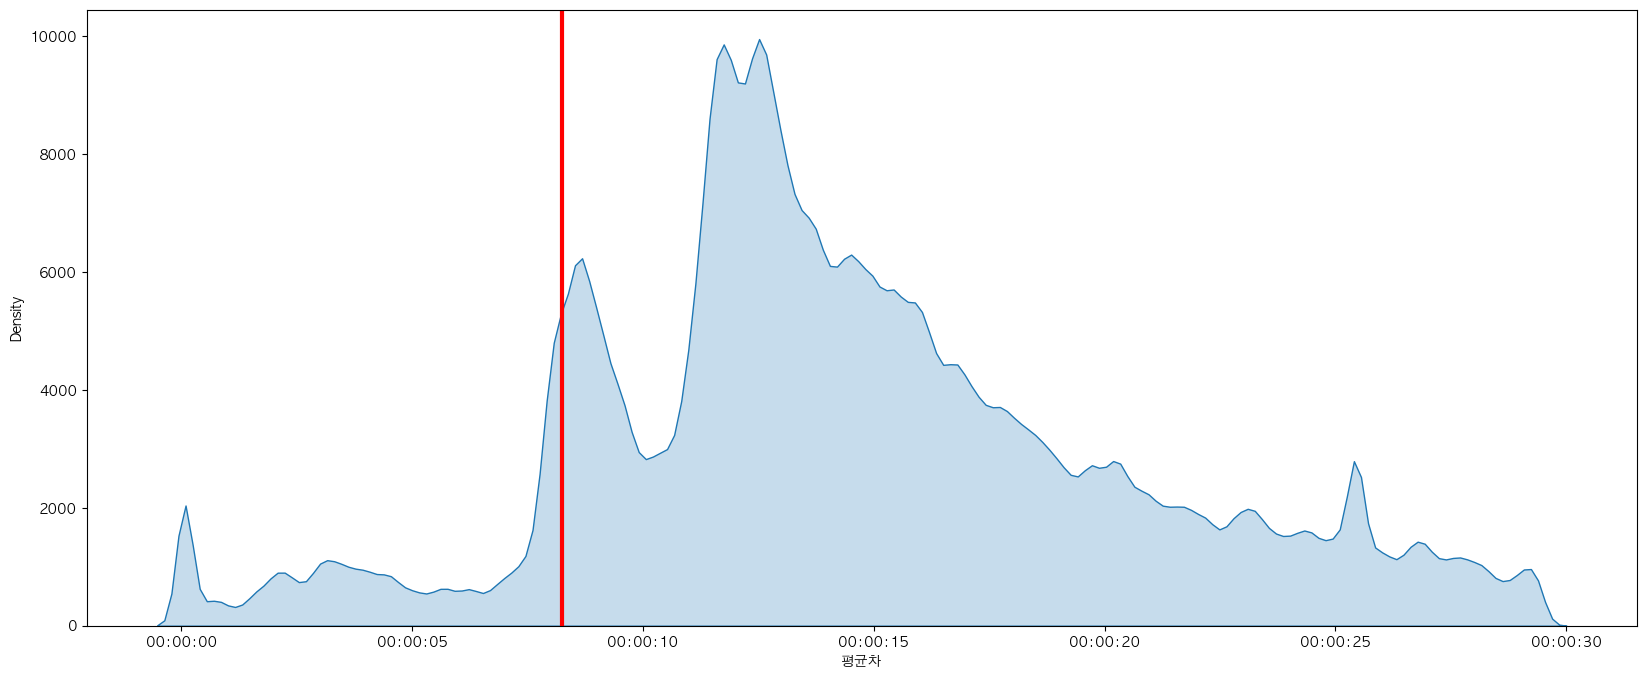

In [1412]:
df = click_10[click_10['평균차'].notna()].sort_values('평균차').reset_index(drop = True)
df = df.loc[:12000, :]

mark = df['평균차'][int(12000 * (0.10))]

sns.kdeplot(df['평균차'], shade = True, bw = 0.03)
plt.axvline(mark, color = 'r', linewidth = 3)
plt.show()

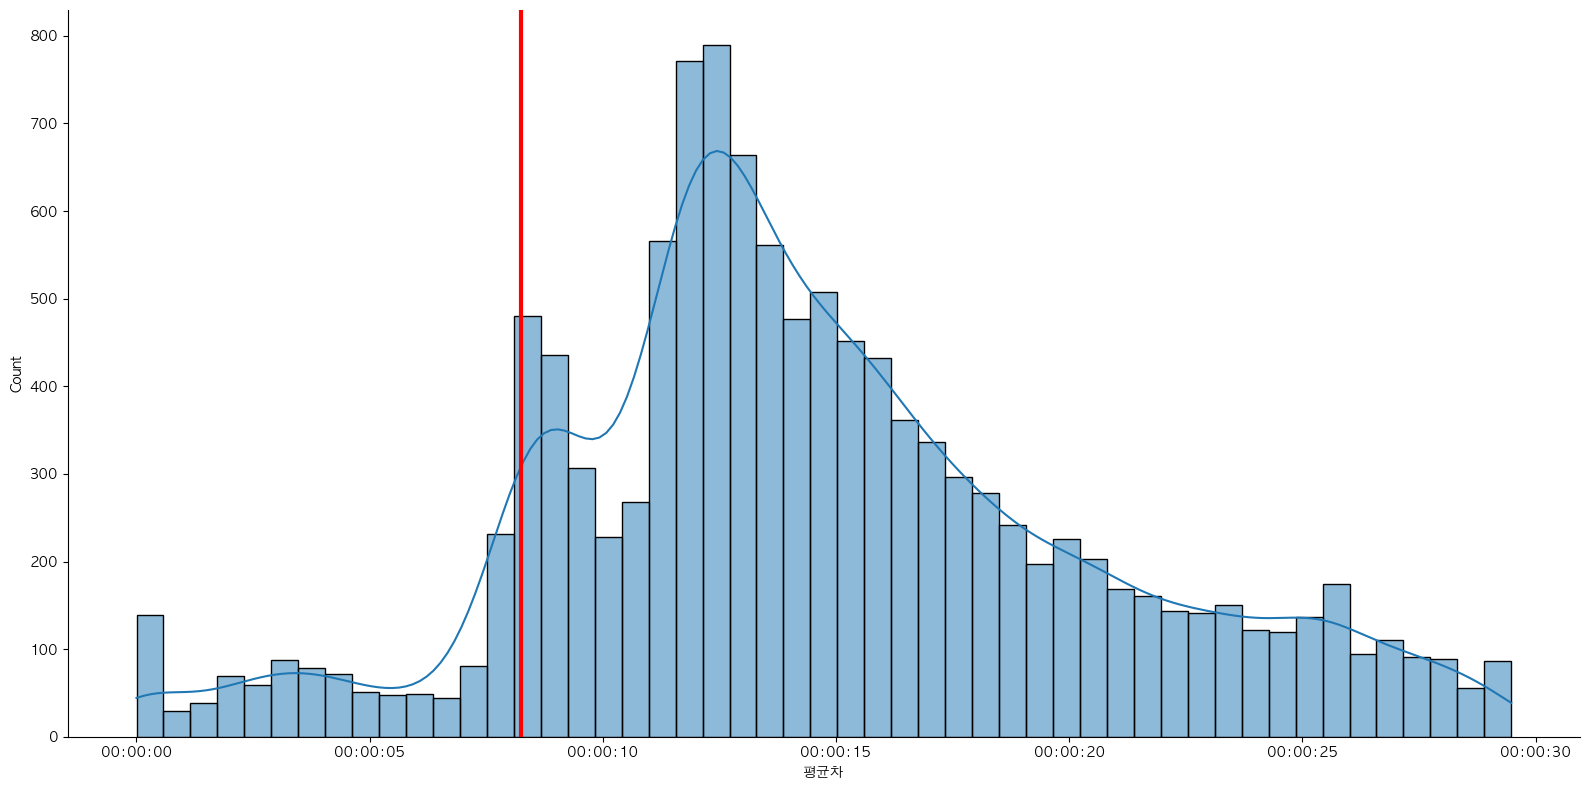

In [1452]:
sns.displot(df['평균차'], height = 8, aspect = 2, kind = 'hist', rug = False, kde = True)
plt.axvline(mark, color = 'r', linewidth = 3)
plt.show()

## [Log Analysis Tables]

### 수업별 log 정렬 table(click_per_class)

In [1369]:
pd.set_option('display.max_columns', 65)

In [1370]:
def getClickPerClass(sem) :

    ret = pd.DataFrame()
    new_ser = pd.Series(0)
    drop_cols = ['이수구분코드', '이수구분코드명']
    class_df = classes[classes['학기(10:1학기, 20:2학기)'] == sem].drop(drop_cols, axis = 1).drop_duplicates(subset = '수업번호')
    
    for id in tqdm(class_df.수업번호.unique()) :
        ser = log_eda[(log_eda['수업학기'] == sem) & (log_eda['수업번호'] == id)].순번.value_counts().sort_index()

        new_ser[0] = id
        for idx in range(1, 6) :
            new_ser.at[idx] = ser.at[idx] if idx in ser.index else 0
        new_ser.at[idx + 1] = ser[ser.index > 5].sum()

        df = pd.DataFrame(new_ser.sort_index()).transpose()
        df.rename(columns = {0 :'수업번호'}, inplace = True)
        ret = pd.concat([ret, df])
    
    ret['과목명'] = ret['수업번호'].progress_apply(lambda x : class_df[class_df['수업번호'] == x].과목명.values[0])
    
    df = log_eda[(log_eda.수업학기 == sem) & (log_eda.취소여부 == '취소')]
    ret['전체취소'] = ret['수업번호'].progress_apply(lambda x : df[df.수업번호 == x].shape[0])
    
    df = log_eda[(log_eda.수업학기 == sem) & (log_eda.취소여부 == '취소') & (df.취소일자.str[:10] > correction_day)]
    ret['정정취소'] = ret['수업번호'].progress_apply(lambda x : df[df.수업번호 == x].shape[0])
    
    ret = ret.set_index('수업번호').sort_index()
    ret = ret[['과목명', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소']]
    
    return ret

In [1371]:
# 학기별 수강신청 정정 일자 확인 및 적용 필요
correction_day = '2022-03-20'
click_per_class_10 = getClickPerClass(10)

correction_day = '2022-09-20'
click_per_class_20 = getClickPerClass(20)

100%|█████████████████████████████████████| 2593/2593 [00:00<00:00, 3649.61it/s]


In [1372]:
hope_10 = hope[hope.수업학기 == 10]
hope_20 = hope[hope.수업학기 == 20]

click_per_class_10 = click_per_class_10.reset_index().merge(hope_10[['수업번호', '희망수업등록', '증원인원']], left_on = '수업번호', right_on = '수업번호', how = 'left')
click_per_class_20 = click_per_class_20.reset_index().merge(hope_20[['수업번호', '희망수업등록', '증원인원']], left_on = '수업번호', right_on = '수업번호', how = 'left')

In [1373]:
def getTO(sem) :

    click_df = eval(f'click_per_class_{sem}')
    class_df = classes[classes['학기(10:1학기, 20:2학기)'] == sem]

    click_df = click_df.merge(class_df[['수업번호', '수강/정원']], left_on = '수업번호', right_on = '수업번호', how = 'left')
    click_df['수강'] = click_df['수강/정원'].apply(lambda x : x.split('/')[0])
    click_df['정원'] = click_df['수강/정원'].apply(lambda x : x.split('/')[1])
    click_df = click_df.drop('수강/정원', axis = 1)
    click_df = click_df[['수업번호', '과목명', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원']]

    return(click_df)

In [1374]:
click_per_class_10 = getTO(10)
click_per_class_20 = getTO(20)

In [1375]:
click_per_class_10

,수업번호,과목명,정원,수강,1,2,3,4,5,6,전체취소,정정취소,희망수업등록,증원인원
0,10002,기초공학,32,26,6,5,13,6,6,6,16,0,39,0
1,10003,건설관리,36,33,6,17,3,3,0,9,5,0,45,0
2,10004,강구조설계,20,13,3,2,3,5,6,5,11,1,19,0
3,10005,수공구조물설계,50,43,3,9,9,10,12,8,8,0,50,0
4,10006,환경정화공학,25,22,2,3,9,4,6,12,14,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150,15491,Intensive Korean (Level 6),4,4,2,3,2,0,0,1,4,0,9,0
5151,15492,AI와암호화폐이야기,80,73,11,11,5,14,7,105,80,4,137,0
5152,15493,성공취업의이해,100,75,0,0,1,3,6,157,92,8,95,0
5153,15494,Introductory Korean (Level 1),15,12,0,0,0,0,0,12,0,0,6,0


In [1376]:
click_per_class_10['수업학기'] = 10
click_per_class_20['수업학기'] = 20

click_per_class_10 = click_per_class_10[['수업학기', '수업번호', '과목명', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원']]
click_per_class_20 = click_per_class_20[['수업학기', '수업번호', '과목명', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원']]

In [1377]:
click_per_class_10.to_csv('./click_per_class_10.csv', encoding = 'utf-8-sig')
click_per_class_20.to_csv('./click_per_class_20.csv', encoding = 'utf-8-sig')

### 전체 수업 관련 인원(top_class_unique)

#### 기본 인원 정보 추가

In [1378]:
click_per_class_10 = click_per_class_10.drop_duplicates(['수업번호', '과목명']).reset_index(drop = True)
click_per_class_20 = click_per_class_20.drop_duplicates(['수업번호', '과목명']).reset_index(drop = True)

In [1379]:
class_10 = classes[classes['학기(10:1학기, 20:2학기)'] == 10].drop_duplicates(['수업번호', '과목명']).reset_index(drop = True)
class_20 = classes[classes['학기(10:1학기, 20:2학기)'] == 20].drop_duplicates(['수업번호', '과목명']).reset_index(drop = True)

In [1380]:
top_class_unique_10 = click_per_class_10.sort_values([1, 2, 3, 4, 5, 6], ascending = False).reset_index(drop = True)
top_class_unique_20 = click_per_class_20.sort_values([1, 2, 3, 4, 5, 6], ascending = False).reset_index(drop = True)

In [1381]:
top_class_unique_10 = top_class_unique_10.merge(class_10[['수업번호', '이수구분코드명']], left_on = '수업번호', right_on = '수업번호', how = 'left')
top_class_unique_20 = top_class_unique_20.merge(class_20[['수업번호', '이수구분코드명']], left_on = '수업번호', right_on = '수업번호', how = 'left')

In [1382]:
top_class_unique_10 = top_class_unique_10[['수업학기', '수업번호', '과목명', '이수구분코드명', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원']]
top_class_unique_10 = top_class_unique_10.rename({'이수구분코드명' : '과목구분'}, axis = 1)

top_class_unique_20 = top_class_unique_20[['수업학기', '수업번호', '과목명', '이수구분코드명', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원']]
top_class_unique_20 = top_class_unique_20.rename({'이수구분코드명' : '과목구분'}, axis = 1)

In [1383]:
class_filter = top_class_unique_10.과목구분.str.contains('전공')
top_class_unique_10.과목구분[class_filter] = '전공'

class_filter = top_class_unique_10.과목구분.str.contains('교양')
top_class_unique_10.과목구분[class_filter] = '교양'

class_filter = top_class_unique_10.과목구분.str.contains('교직')
top_class_unique_10.과목구분[class_filter] = '교직'

class_filter = top_class_unique_10.과목구분.str.contains('ROTC')
top_class_unique_10.과목구분[class_filter] = 'ROTC'


class_filter = top_class_unique_20.과목구분.str.contains('전공')
top_class_unique_20.과목구분[class_filter] = '전공'

class_filter = top_class_unique_20.과목구분.str.contains('교양')
top_class_unique_20.과목구분[class_filter] = '교양'

class_filter = top_class_unique_20.과목구분.str.contains('교직')
top_class_unique_20.과목구분[class_filter] = '교직'

class_filter = top_class_unique_20.과목구분.str.contains('ROTC')
top_class_unique_20.과목구분[class_filter] = 'ROTC'

# top_class_unique_10

In [1384]:
year = 2022
top_class_unique_10['수업년도'] = year

year = 2021
top_class_unique_20['수업년도'] = year

In [1385]:
top_class_unique_10 = top_class_unique_10[['수업년도', '수업학기', '수업번호', '과목명', '과목구분', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원']]
top_class_unique_20 = top_class_unique_20[['수업년도', '수업학기', '수업번호', '과목명', '과목구분', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원']]

In [1386]:
top_class_unique_10

,수업년도,수업학기,수업번호,과목명,과목구분,정원,수강,1,2,3,4,5,6,전체취소,정정취소,희망수업등록,증원인원
0,2022,10,15391,한양글로벌인재특강,교양,300,297,295,0,1,3,0,31,33,3,1058,0
1,2022,10,15401,인문학과예술이본인간,교양,450,446,217,105,46,20,21,92,55,3,771,0
2,2022,10,15140,사회봉사,교양,0,895,162,73,93,115,148,895,591,8,0,0
3,2022,10,15455,21세기기업의인재상,교양,150,149,141,4,3,0,0,14,13,1,752,0
4,2022,10,15449,문화기술과사회변동,교양,150,148,139,10,0,1,0,9,11,1,542,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,2022,10,13333,생체공학연구실현장실습3,전공,0,1,0,0,0,0,0,1,0,0,1,1
2707,2022,10,13339,생체공학연구실현장실습3,전공,0,1,0,0,0,0,0,1,0,0,1,1
2708,2022,10,13340,생체공학연구실현장실습3,전공,0,1,0,0,0,0,0,1,0,0,2,1
2709,2022,10,13552,실용공학연구3,전공,2,1,0,0,0,0,0,1,0,0,1,0


#### 재수강 인원 추가

In [1387]:
sem = 10
year = 2022
log_retry = log_eda[(log_eda.수업학기 == sem) & (log_eda.재수강여부 == 1) & (log_eda.취소여부 == '신청')]

retry = pd.DataFrame(log_retry.수업번호.value_counts()).reset_index()
retry.columns = ['수업번호', '재수강인원']

retry['수업년도'] = year
retry['수업학기'] = sem

retry_10 = retry[['수업년도', '수업학기', '수업번호', '재수강인원']]
retry_10

sem = 20
year = 2021
log_retry = log_eda[(log_eda.수업학기 == sem) & (log_eda.재수강여부 == 1) & (log_eda.취소여부 == '신청')]

retry = pd.DataFrame(log_retry.수업번호.value_counts()).reset_index()
retry.columns = ['수업번호', '재수강인원']

retry['수업년도'] = year
retry['수업학기'] = sem

retry_20 = retry[['수업년도', '수업학기', '수업번호', '재수강인원']]
retry_20

retry_10

,수업년도,수업학기,수업번호,재수강인원
0,2022,10,15413,306
1,2022,10,15415,100
2,2022,10,13573,91
3,2022,10,15410,35
4,2022,10,15408,33
...,...,...,...,...
1045,2022,10,11067,1
1046,2022,10,11060,1
1047,2022,10,10976,1
1048,2022,10,13506,1


In [1388]:
keys = ['수업년도', '수업학기', '수업번호']
top_class_unique_10 = top_class_unique_10.merge(retry_10, left_on = keys, right_on = keys, how = 'left')
top_class_unique_20 = top_class_unique_20.merge(retry_20, left_on = keys, right_on = keys, how = 'left')

In [1389]:
top_class_unique_10.재수강인원 = top_class_unique_10.재수강인원.astype('Int64')
top_class_unique_20.재수강인원 = top_class_unique_10.재수강인원.astype('Int64')

In [1516]:
top_class_unique_10

,수업년도,수업학기,수업번호,과목명,과목구분,정원,수강,1,2,3,4,5,6,전체취소,정정취소,희망수업등록,증원인원,재수강인원
0,2022,10,15391,한양글로벌인재특강,교양,300,297,295,0,1,3,0,31,33,3,1058,0,10
1,2022,10,15401,인문학과예술이본인간,교양,450,446,217,105,46,20,21,92,55,3,771,0,4
2,2022,10,15140,사회봉사,교양,0,895,162,73,93,115,148,895,591,8,0,0,<NA>
3,2022,10,15455,21세기기업의인재상,교양,150,149,141,4,3,0,0,14,13,1,752,0,<NA>
4,2022,10,15449,문화기술과사회변동,교양,150,148,139,10,0,1,0,9,11,1,542,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,2022,10,13333,생체공학연구실현장실습3,전공,0,1,0,0,0,0,0,1,0,0,1,1,<NA>
2707,2022,10,13339,생체공학연구실현장실습3,전공,0,1,0,0,0,0,0,1,0,0,1,1,<NA>
2708,2022,10,13340,생체공학연구실현장실습3,전공,0,1,0,0,0,0,0,1,0,0,2,1,<NA>
2709,2022,10,13552,실용공학연구3,전공,2,1,0,0,0,0,0,1,0,0,1,0,<NA>


In [1517]:
##### to_csv
top_class_unique_10[['수업년도', '수업학기', '수업번호', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원', '재수강인원']].to_csv('./top_class_unique_10.csv', encoding = 'utf-8-sig')
top_class_unique_20[['수업년도', '수업학기', '수업번호', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원', '재수강인원']].to_csv('./top_class_unique_20.csv', encoding = 'utf-8-sig')

### 학과 학년 관련 순위(click_per_rank)

#### 학과 학년별 수강 기록 확인

In [1524]:
def getClickPerGrade(sem, grade) :

    ret = pd.DataFrame()
    new_ser = pd.Series(0)
    drop_cols = ['이수구분코드', '이수구분코드명']
    class_df = classes[classes['학기(10:1학기, 20:2학기)'] == sem].drop(drop_cols, axis = 1).drop_duplicates(subset = '수업번호')
    
    click_per_grade = log_eda_grade[(log_eda_grade['수업학기'] == sem) & 
                                    (log_eda_grade['학년'] == grade) & 
                                    (log_eda_grade['취소여부'] == '신청')]
    
    if click_per_grade.shape[0] == 0 : return ret
    
    for id in tqdm(click_per_grade.수업번호.value_counts().sort_index().index) :
        ser = click_per_grade[(click_per_grade['수업번호'] == id)].순번.value_counts().sort_index()

        new_ser[0] = id
        for idx in range(1, 6) :
            new_ser.at[idx] = ser.at[idx] if idx in ser.index else 0
        new_ser.at[idx + 1] = ser[ser.index > 5].sum()

        df = pd.DataFrame(new_ser.sort_index()).transpose()
        df.rename(columns = {0 :'수업번호'}, inplace = True)
        ret = pd.concat([ret, df])
    
    # ret['과목명'] = ret['수업번호'].progress_apply(lambda x : class_per_dept[class_per_dept['수업번호'] == x].과목명.values[0])
    ret['과목명'] = ret['수업번호'].apply(lambda x : click_per_grade[click_per_grade['수업번호'] == x].과목명.values[0])
    
    df = click_per_grade[(click_per_grade.취소여부 == '취소')]
    # ret['전체취소'] = ret['수업번호'].progress_apply(lambda x : df[df.수업번호 == x].shape[0])
    ret['전체취소'] = ret['수업번호'].apply(lambda x : df[df.수업번호 == x].shape[0])
    
    df = click_per_grade[(click_per_grade.취소여부 == '취소') & (click_per_grade.취소일자.str[:10] > correction_day)]
    # ret['정정취소'] = ret['수업번호'].progress_apply(lambda x : df[df.수업번호 == x].shape[0])
    ret['정정취소'] = ret['수업번호'].apply(lambda x : df[df.수업번호 == x].shape[0])
    
    ret = ret.set_index('수업번호').sort_index()
    ret = ret[['과목명', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소']]
    
    return ret

def getTO(click_df, sem) :

    class_df = classes[classes['학기(10:1학기, 20:2학기)'] == sem]

    click_df = click_df.merge(class_df[['수업번호', '수강/정원']], left_on = '수업번호', right_on = '수업번호', how = 'left')
    click_df['수강/정원'] = click_df['수강/정원'].fillna('0/0')
    
    click_df['수강'] = pd.to_numeric(click_df['수강/정원'].apply(lambda x : x.split('/')[0]))
    click_df['정원'] = pd.to_numeric(click_df['수강/정원'].apply(lambda x : x.split('/')[1]))
    click_df = click_df.drop('수강/정원', axis = 1)
    
    click_df = click_df.drop_duplicates(['수업번호', '과목명']).reset_index(drop = True)
    click_df = click_df[['수업번호', '과목명', '정원', '수강', 1, 2, 3, 4, 5, 6, '전체취소', '정정취소', '희망수업등록', '증원인원']]

    return(click_df)

def getClickRate(record) :
    sums = record.정원
    if sums == 0 : return np.NaN

    weights = [50, 28, 12, 6, 3, 1]
    clicks = record[[1, 2, 3, 4, 5, 6]]

    rates = clicks.astype(int) / sums
    score = (rates * weights).sum()
    
    return score

In [1525]:
def makeClickPerGrade(year, sem, correction_day) :
    ret = pd.DataFrame()
    for grade in range(1, 5) :

        hope_df = eval(f'hope_{sem}') 
        hope_df = hope[hope.수업학기 == sem]

        click_per_grade = getClickPerGrade(sem, grade)
        if click_per_grade.shape[0] == 0 : continue

        click_per_grade = click_per_grade.reset_index().merge(hope_df[['수업번호', '희망수업등록', '증원인원']], left_on = '수업번호', right_on = '수업번호', how = 'left')
        click_per_grade = getTO(click_per_grade, sem)

        click_per_grade['수업년도'] = year
        click_per_grade['수업학기'] = sem
        click_per_grade['학년'] = grade     
        click_per_grade['학년실수강'] = click_per_grade[[1, 2, 3, 4, 5, 6]].sum(axis = 1)

        click_per_grade['신청순서비'] = click_per_grade.progress_apply(lambda x : getClickRate(x), axis = 1)

        click_per_grade = click_per_grade.merge(eval(f'class_{sem}')[['수업번호', '이수구분코드명']], left_on = '수업번호', right_on = '수업번호', how = 'left')

        click_per_grade = click_per_grade[['수업년도', '수업학기', '수업번호', '과목명', '이수구분코드명', '정원', '수강', '학년', '학년실수강', '신청순서비']]
        
        ret = pd.concat([ret, click_per_grade])
        
    return ret

In [1526]:
year = 2022
sem = 10
correction_day = '2022-03-20'
    
click_per_grade_10 = makeClickPerGrade(year, sem, correction_day)

year = 2021
sem = 20
correction_day = '2022-09-20'

click_per_grade_20 = makeClickPerGrade(year, sem, correction_day)

100%|█████████████████████████████████████| 2050/2050 [00:01<00:00, 1783.86it/s]


In [1530]:
click_per_grade_20

,수업년도,수업학기,수업번호,과목명,이수구분코드명,정원,수강,학년,학년실수강,신청순서비
0,2021,20,10135,한국가곡문헌2,전공심화,40,12,1,5,0.125000
1,2021,20,10147,중등음악교육실습2,전공심화,25,5,1,1,0.040000
2,2021,20,10172,셰익스피어,전공심화,50,39,1,1,0.020000
3,2021,20,10209,품질경영,전공심화,60,57,1,1,0.016667
4,2021,20,10352,춤과미디어,전공심화,50,11,1,1,0.020000
...,...,...,...,...,...,...,...,...,...,...
2045,2021,20,32718,물리화학적유체시스템,NaN,0,0,4,1,NaN
2046,2021,20,33580,보안SoC설계,NaN,0,0,4,5,NaN
2047,2021,20,33596,집적회로소자,NaN,0,0,4,2,NaN
2048,2021,20,33701,기후변화협상전략,NaN,0,0,4,1,NaN


#### 학년별 수강신청 시작 시간 확인

In [1531]:
log_eda_grade[(log_eda_grade.수업학기 == 10) & (log_eda_grade.학년 == 1)].신청일자.str[:10].value_counts().index[0]

'2022-02-24'

In [1532]:
a = list()
a.append(log_eda_grade[(log_eda_grade.수업학기 == sem) & (log_eda_grade.학년 == grade)].신청일자.str[:10].value_counts())
a = pd.DataFrame(a).transpose()
a

,신청일자
2022-08-10,13718
2022-08-11,5936
2022-09-07,3723
2022-09-13,2920
2022-09-08,1173
2022-08-12,1055
2022-08-08,703
2022-09-02,564
2022-08-09,227
2022-09-14,111


In [1533]:
date = [[]]
li = []
d = pd.DataFrame([])

for sem in range(10, 21, 10) :
    li = ['']
    d = []
    for grade in range(1, 5) :
        df = log_eda_grade[(log_eda_grade.수업학기 == sem) & (log_eda_grade.학년 == grade)].신청일자
        li.append(df.str[:10].value_counts().index[0] + ' 11:00:00')
        
        # a.append(df.str[:10].value_counts())
        # a = pd.DataFrame(a).transpose()
        # d = pd.concat([d, a])
        
    date.append(li)

date

[[],
 ['',
  '2022-02-24 11:00:00',
  '2022-02-08 11:00:00',
  '2022-02-07 11:00:00',
  '2022-02-04 11:00:00'],
 ['',
  '2022-08-05 11:00:00',
  '2022-08-08 11:00:00',
  '2022-08-09 11:00:00',
  '2022-08-10 11:00:00']]

#### 수업별 정원의 50%가 신청되는 시간 확인(cpg_time)

In [1534]:
def getClickPerTime(year, sem, touchdown_rate) :
    ret = pd.DataFrame()
    log_sem = log_eda_grade[(log_eda_grade['수업학기'] == sem) & 
                            ~(log_eda_grade.신청일자.str.contains('2022-02-03'))] # 교환학생 outlier 제거
    class_sem = classes[classes['학기(10:1학기, 20:2학기)'] == sem]

    for id in tqdm(log_sem.수업번호.unique()) :
        class_df = class_sem[class_sem['수업번호'] == id]
        if class_df.shape[0] == 0 : continue

        class_to = int(class_df['수강/정원'].values[0].split('/')[1])

        # 교양 -> 학년 분리
        if ~(class_df.영역코드명.str.contains('영역없음').values[0]) :
            weight = 4

            for grade in range(1, 5) :
                touchdown = int((class_to) / (weight) * (touchdown_rate / 100))
                log_df = log_sem[(log_sem['수업번호'] == id) & (log_sem['학년'] == grade)].sort_values('신청일자')

                if log_df.shape[0] == 0 : touchdown_time = 0
                else :  
                    if touchdown >= log_df.shape[0] : touchdown = (log_df.shape[0]) - 1
                    touchdown_time = log_df.iloc[touchdown, :].신청일자

                ret = pd.concat([ret, pd.DataFrame(np.array([year, sem, grade, id, class_df.과목명.values[0], touchdown_time])).transpose()])

        # 교양 외 -> 학년 통합(1~4 학년 동일하게 입력)
        else :
            weight = 1

            touchdown = int((class_to) / (weight) * (touchdown_rate / 100))
            log_df = log_sem[(log_sem['수업번호'] == id)].sort_values('신청일자')

            if log_df.shape[0] == 0 : touchdown_time = 0
            else :  
                if touchdown >= log_df.shape[0] : touchdown = (log_df.shape[0]) - 1
                touchdown_time = log_df.iloc[touchdown, :].신청일자

            for grade in range(1, 5) :
                ret = pd.concat([ret, pd.DataFrame(np.array([year, sem, grade, id, class_df.과목명.values[0], touchdown_time])).transpose()])

    ret.columns = ['수업년도', '수업학기', '학년', '수업번호', '과목명', '실도달시간']
    ret.수업년도 = pd.to_numeric(ret.수업년도)
    ret.수업학기 = pd.to_numeric(ret.수업학기)
    ret.수업번호 = pd.to_numeric(ret.수업번호)
    ret.학년 = pd.to_numeric(ret.학년)
    ret = ret.reset_index(drop = True)

    ret = ret.merge(eval(f'class_{sem}')[['수업번호', '이수구분코드명']], left_on = '수업번호', right_on = '수업번호', how = 'left')
    ret = ret[['수업년도', '수업학기', '학년', '수업번호', '과목명', '이수구분코드명', '실도달시간']]
    
    return ret

In [1535]:
year = 2022
sem = 10
touchdown_rate = 50

ret_10 = getClickPerTime(year, sem, touchdown_rate)

year = 2021
sem = 20
touchdown_rate = 50

ret_20 = getClickPerTime(year, sem, touchdown_rate)

100%|██████████████████████████████████████| 2873/2873 [00:09<00:00, 318.57it/s]


In [1536]:
keys = ['수업년도', '수업학기', '수업번호', '학년']
click_per_grade_time_10 = click_per_grade_10.merge(ret_10[['수업년도', '수업학기', '학년', '수업번호', '실도달시간']], left_on = keys, right_on = keys)
click_per_grade_time_20 = click_per_grade_20.merge(ret_20[['수업년도', '수업학기', '학년', '수업번호', '실도달시간']], left_on = keys, right_on = keys)

In [1537]:
def helper(x) :
    if x.실도달시간[5:7] == correction_month :
        return '정정이후'
    else : 
        d = date[int(int(x.수업학기) / 10)][int(x.학년)]
        return abs(pd.to_datetime(x.실도달시간) - pd.to_datetime(d))

        return x[11:]

correction_month = '03'
click_per_grade_time_10[click_per_grade_time_10.실도달시간.str[5:7] == correction_month].실도달시간 = '정정이후'
click_per_grade_time_10['도달시간'] = click_per_grade_time_10.progress_apply(lambda x : helper(x), axis = 1)

correction_month = '09'
click_per_grade_time_20[click_per_grade_time_20.실도달시간.str[5:7] == correction_month].실도달시간 = '정정이후'
click_per_grade_time_20['도달시간'] = click_per_grade_time_20.progress_apply(lambda x : helper(x), axis = 1)

100%|█████████████████████████████████████| 6218/6218 [00:00<00:00, 7896.08it/s]


In [1538]:
# 정정 날짜 추가 및 반영 필요
# 전공 수업은 4개 학년 시간 중 (가장 빠른 시간) -> (실수강 수가 많은 학년의 도달시간) 으로 입력 필요

df = click_per_grade_time_10[~click_per_grade_time_10.이수구분코드명.str.contains('교양')]
for id in tqdm(df.수업번호.unique()) :
    df_id = df[df['수업번호'] == id]
    md = df_id[(df_id.학년실수강) == (df_id.학년실수강.max())].도달시간.values[0]
    df.loc[df['수업번호'] == id, '도달시간'] = md

click_per_grade_time_10 = pd.concat([df, click_per_grade_time_10[click_per_grade_time_10.이수구분코드명.str.contains('교양')]])

df = click_per_grade_time_20[~click_per_grade_time_20.이수구분코드명.str.contains('교양')]
for id in tqdm(df.수업번호.unique()) :
    df_id = df[df['수업번호'] == id]
    md = df_id[(df_id.학년실수강) == (df_id.학년실수강.max())].도달시간.values[0]
    df.loc[df['수업번호'] == id, '도달시간'] = md

click_per_grade_time_20 = pd.concat([df, click_per_grade_time_20[click_per_grade_time_20.이수구분코드명.str.contains('교양')]])

100%|█████████████████████████████████████| 1733/1733 [00:01<00:00, 1365.10it/s]


In [1539]:
click_per_grade_time_10

,수업년도,수업학기,수업번호,과목명,이수구분코드명,정원,수강,학년,학년실수강,신청순서비,실도달시간,도달시간
0,2022,10,10316,법철학,전공심화,60,36,1,1,0.016667,2022-02-09 16:00:36.40104,5 days 05:00:36.401040
1,2022,10,10356,인적자원개발론,전공심화,48,38,1,1,0.020833,2022-02-04 11:01:35.459288,0 days 00:01:35.459288
2,2022,10,10437,금융공학,전공심화,55,15,1,1,0.018182,2022-02-09 16:02:59.735056,5 days 05:02:59.735056
3,2022,10,10697,한국어텍스트의이해,전공심화,40,17,1,1,0.025000,2022-02-07 11:23:43.108808,3 days 00:23:43.108808
5,2022,10,10737,일반화학및실험,전공기초(필수),60,59,1,55,7.566667,2022-02-24 11:01:15.755995,0 days 00:01:15.755995
...,...,...,...,...,...,...,...,...,...,...,...,...
6094,2022,10,15487,프레젠테이션기법,핵심교양,20,20,4,5,11.400000,2022-02-04 11:00:08.324598,0 days 00:00:08.324598
6095,2022,10,15488,그림으로배우는사이버일본어,핵심교양,20,20,4,5,7.600000,2022-02-04 11:00:11.900811,0 days 00:00:11.900811
6096,2022,10,15489,창업기초:스타트업기업가정신의이해와사례,핵심교양,40,36,4,6,3.000000,2022-02-04 11:00:47.782222,0 days 00:00:47.782222
6098,2022,10,15492,AI와암호화폐이야기,핵심교양,80,73,4,13,1.375000,2022-02-09 16:03:37.575564,5 days 05:03:37.575564


In [1640]:
click_per_grade_time_10[['수업년도', '수업학기', '수업번호', '과목명', '정원', '수강', '실도달시간', '도달시간']].sort_values('실도달시간').reset_index(drop = True)

,수업년도,수업학기,수업번호,과목명,정원,수강,실도달시간,도달시간
0,2022,10,15412,인문클래식BL:삼국지와인간,30,30,2022-02-04 11:00:00.379744,0 days 00:00:00.379744
1,2022,10,15360,AI+X:머신러닝,30,87,2022-02-04 11:00:01.094654,0 days 00:00:01.094654
2,2022,10,15013,비판적글읽기,20,17,2022-02-04 11:00:01.190375,0 days 00:00:01.190375
3,2022,10,15197,사마천과의대화,50,49,2022-02-04 11:00:01.455598,0 days 00:00:01.455598
4,2022,10,15357,AI+X:인공지능,30,81,2022-02-04 11:00:01.748843,0 days 00:00:01.748843
...,...,...,...,...,...,...,...,...
6095,2022,10,13599,실용공학연구3,1,1,2022-03-14 09:01:59.760179,정정이후
6096,2022,10,13600,캡스톤디자인산학협력,10,7,2022-03-14 09:15:29.022471,정정이후
6097,2022,10,10298,젠더와문학,30,7,2022-03-14 11:40:06.544836,정정이후
6098,2022,10,10298,젠더와문학,30,7,2022-03-14 11:40:06.544836,정정이후


#### 수업별 특정 시간 내에 신청 인원(cpg_count)

In [1540]:
def getClickPerCount(year, sem, touchdown_sec) :
    log_sem = log_eda_grade[(log_eda_grade['수업학기'] == sem) & 
                            ~(log_eda_grade.신청일자.str.contains('2022-02-03'))]
    class_sem = classes[classes['학기(10:1학기, 20:2학기)'] == sem]

    ret = pd.DataFrame()
    li = list()

    for id in tqdm(log_sem.수업번호.unique()) :
        class_df = class_sem[class_sem.수업번호 == id]
        if class_df.shape[0] == 0 : 
            li.append(id)
            continue

        if ~(class_df.영역코드명.str.contains('영역없음').values[0]) :
            for grade in range(1, 5) :

                log_df = log_sem[(log_sem['수업번호'] == id) & (log_sem['학년'] == grade)].sort_values('신청일자')
                if log_df.shape[0] == 0 : continue

                start = log_df.head(1).신청일자.str[:13]

                touchdown = pd.to_datetime(start) + pd.to_timedelta(touchdown_sec)
                touchdown = str(touchdown.values[0]).replace('T', ' ')

                count = log_df[log_df.신청일자 <= touchdown].shape[0]

                sub = class_df.과목명.values[0] if class_df.shape[0] > 0 else np.NaN

                df = pd.DataFrame([year, sem, id, sub, class_df.이수구분코드명.values[0], grade, touchdown[:23], count]).transpose()
                ret = pd.concat([ret, df])

        else :   
            log_df = log_sem[(log_sem['수업번호'] == id)].sort_values('신청일자')
            if log_df.shape[0] == 0 : continue

            start = log_df.head(1).신청일자.str[:13]

            touchdown = pd.to_datetime(start) + pd.to_timedelta(touchdown_sec)
            touchdown = str(touchdown.values[0]).replace('T', ' ')

            count = log_df[log_df.신청일자 <= touchdown].shape[0]

            sub = class_df.과목명.values[0] if class_df.shape[0] > 0 else np.NaN

            for grade in range(1, 5) :
                df = pd.DataFrame([year, sem, id, sub, class_df.이수구분코드명.values[0], grade, touchdown[:23], count]).transpose()
                ret = pd.concat([ret, df])

    ret.columns = ['수업년도', '수업학기', '수업번호', '과목명', '이수구분코드명', '학년', '기준시간', '기준시간내신청']
    ret = ret.reset_index(drop = True)
    
    return ret

In [1541]:
year = 2022
sem = 10
touchdown_sec = '00:00:15'

ret_10 = getClickPerCount(year, sem, touchdown_sec)

year = 2021
sem = 20
touchdown_sec = '00:00:15'

ret_20 = getClickPerCount(year, sem, touchdown_sec)

100%|██████████████████████████████████████| 2873/2873 [00:11<00:00, 250.33it/s]


In [1542]:
keys = ['수업년도', '수업학기', '수업번호', '학년']
click_per_grade_time_count_10 = click_per_grade_time_10.merge(ret_10[['수업년도', '수업학기', '학년', '수업번호', '기준시간', '기준시간내신청']], left_on = keys, right_on = keys, how = 'left')
click_per_grade_time_count_20 = click_per_grade_time_20.merge(ret_20[['수업년도', '수업학기', '학년', '수업번호', '기준시간', '기준시간내신청']], left_on = keys, right_on = keys, how = 'left')

In [1543]:
click_per_grade_time_count_10

,수업년도,수업학기,수업번호,과목명,이수구분코드명,정원,수강,학년,학년실수강,신청순서비,실도달시간,도달시간,기준시간,기준시간내신청
0,2022,10,10316,법철학,전공심화,60,36,1,1,0.016667,2022-02-09 16:00:36.40104,5 days 05:00:36.401040,2022-02-04 11:00:15.000,0
1,2022,10,10356,인적자원개발론,전공심화,48,38,1,1,0.020833,2022-02-04 11:01:35.459288,0 days 00:01:35.459288,2022-02-04 11:00:15.000,1
2,2022,10,10437,금융공학,전공심화,55,15,1,1,0.018182,2022-02-09 16:02:59.735056,5 days 05:02:59.735056,2022-02-04 11:00:15.000,0
3,2022,10,10697,한국어텍스트의이해,전공심화,40,17,1,1,0.025000,2022-02-07 11:23:43.108808,3 days 00:23:43.108808,2022-02-04 11:00:15.000,0
4,2022,10,10737,일반화학및실험,전공기초(필수),60,59,1,55,7.566667,2022-02-24 11:01:15.755995,0 days 00:01:15.755995,2022-02-24 11:00:15.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,2022,10,15487,프레젠테이션기법,핵심교양,20,20,4,5,11.400000,2022-02-04 11:00:08.324598,0 days 00:00:08.324598,2022-02-04 11:00:15.000,4
6096,2022,10,15488,그림으로배우는사이버일본어,핵심교양,20,20,4,5,7.600000,2022-02-04 11:00:11.900811,0 days 00:00:11.900811,2022-02-04 11:00:15.000,5
6097,2022,10,15489,창업기초:스타트업기업가정신의이해와사례,핵심교양,40,36,4,6,3.000000,2022-02-04 11:00:47.782222,0 days 00:00:47.782222,2022-02-04 11:00:15.000,1
6098,2022,10,15492,AI와암호화폐이야기,핵심교양,80,73,4,13,1.375000,2022-02-09 16:03:37.575564,5 days 05:03:37.575564,2022-02-09 16:00:15.000,1


In [1645]:
click_per_grade_time_count_10[['수업년도', '수업학기', '수업번호', '과목명', '정원', '수강', '기준시간', '기준시간내신청']].drop_duplicates('수업번호', keep = 'last').sort_values('기준시간내신청', ascending = False).reset_index(drop = True).head(3)

,수업년도,수업학기,수업번호,과목명,정원,수강,기준시간,기준시간내신청
0,2022,10,15391,한양글로벌인재특강,300,297,2022-02-04 11:00:15.000,71
1,2022,10,10449,관리경제,84,84,2022-02-04 11:00:15.000,69
2,2022,10,10371,노사관계,60,72,2022-02-04 11:00:15.000,53


#### 희망비 추가(cpg_hope)

In [1607]:
keys = ['수업학기', '수업번호']
click_per_grade_time_count_hope_10 = click_per_grade_time_count_10.merge(hope_10[['수업학기', '수업번호', '희망수업등록']], left_on = keys, right_on = keys, how = 'left')
click_per_grade_time_count_hope_20 = click_per_grade_time_count_20.merge(hope_20[['수업학기', '수업번호', '희망수업등록']], left_on = keys, right_on = keys, how = 'left')

In [1608]:
click_per_grade_time_count_hope_10['희망비'] = click_per_grade_time_count_hope_10.희망수업등록.astype('Int64') / click_per_grade_time_count_hope_10.정원.astype(int)
click_per_grade_time_count_hope_20['희망비'] = click_per_grade_time_count_hope_20.희망수업등록.astype('Int64') / click_per_grade_time_count_hope_20.정원.astype(int)

In [1609]:
click_per_grade_time_count_hope_10

,수업년도,수업학기,수업번호,과목명,이수구분코드명,정원,수강,학년,학년실수강,신청순서비,실도달시간,도달시간,기준시간,기준시간내신청,희망수업등록,희망비
0,2022,10,10316,법철학,전공심화,60,36,1,1,0.016667,2022-02-09 16:00:36.40104,5 days 05:00:36.401040,2022-02-04 11:00:15.000,0,51,0.85
1,2022,10,10356,인적자원개발론,전공심화,48,38,1,1,0.020833,2022-02-04 11:01:35.459288,0 days 00:01:35.459288,2022-02-04 11:00:15.000,1,63,1.3125
2,2022,10,10437,금융공학,전공심화,55,15,1,1,0.018182,2022-02-09 16:02:59.735056,5 days 05:02:59.735056,2022-02-04 11:00:15.000,0,48,0.872727
3,2022,10,10697,한국어텍스트의이해,전공심화,40,17,1,1,0.025000,2022-02-07 11:23:43.108808,3 days 00:23:43.108808,2022-02-04 11:00:15.000,0,35,0.875
4,2022,10,10737,일반화학및실험,전공기초(필수),60,59,1,55,7.566667,2022-02-24 11:01:15.755995,0 days 00:01:15.755995,2022-02-24 11:00:15.000,1,75,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,2022,10,15487,프레젠테이션기법,핵심교양,20,20,4,5,11.400000,2022-02-04 11:00:08.324598,0 days 00:00:08.324598,2022-02-04 11:00:15.000,4,90,4.5
6096,2022,10,15488,그림으로배우는사이버일본어,핵심교양,20,20,4,5,7.600000,2022-02-04 11:00:11.900811,0 days 00:00:11.900811,2022-02-04 11:00:15.000,5,72,3.6
6097,2022,10,15489,창업기초:스타트업기업가정신의이해와사례,핵심교양,40,36,4,6,3.000000,2022-02-04 11:00:47.782222,0 days 00:00:47.782222,2022-02-04 11:00:15.000,1,83,2.075
6098,2022,10,15492,AI와암호화폐이야기,핵심교양,80,73,4,13,1.375000,2022-02-09 16:03:37.575564,5 days 05:03:37.575564,2022-02-09 16:00:15.000,1,137,1.7125


In [1610]:
click_per_grade_time_count_hope_10[click_per_grade_time_count_hope_10.수업번호 == 10316]

,수업년도,수업학기,수업번호,과목명,이수구분코드명,정원,수강,학년,학년실수강,신청순서비,실도달시간,도달시간,기준시간,기준시간내신청,희망수업등록,희망비
0,2022,10,10316,법철학,전공심화,60,36,1,1,0.016667,2022-02-09 16:00:36.40104,5 days 05:00:36.401040,2022-02-04 11:00:15.000,0,51,0.85
1239,2022,10,10316,법철학,전공심화,60,36,3,16,0.416667,2022-02-09 16:00:36.40104,5 days 05:00:36.401040,2022-02-04 11:00:15.000,0,51,0.85
2577,2022,10,10316,법철학,전공심화,60,36,4,19,3.833333,2022-02-09 16:00:36.40104,5 days 05:00:36.401040,2022-02-04 11:00:15.000,0,51,0.85


In [1611]:
##### 학년 배당 정원 적용
def getToPerGrade(df) :
    ret = pd.DataFrame()
    for ids in tqdm(df.수업번호.unique()) :
        total_to = df[df['수업번호'] == ids].정원.values[0]
    
        div = int(total_to / 4)
        mod = total_to % 4

        #print(ids, total_to, div, mod)
        
        for grade in range(4, 0, -1) :
            if (mod > 0) : 
                grade_to = div + 1
                mod = mod - 1
            else :
                grade_to = div
            
            ret = pd.concat([ret, pd.DataFrame([ids, grade, int(grade_to)]).transpose()])
            
    ret.columns = ['수업번호', '학년', '학년별정원']
    return df.merge(ret, on = ['수업번호', '학년'], how = 'left')

In [1612]:
click_per_grade_time_count_hope_10 = getToPerGrade(click_per_grade_time_count_hope_10)
click_per_grade_time_count_hope_10 = click_per_grade_time_count_hope_10[['수업년도', '수업학기', '수업번호', '과목명', '이수구분코드명', '정원', '학년별정원', '수강', '학년', '학년실수강', '신청순서비', '실도달시간', '도달시간', '기준시간', '기준시간내신청', '희망수업등록', '희망비']]

click_per_grade_time_count_hope_20 = getToPerGrade(click_per_grade_time_count_hope_20)
click_per_grade_time_count_hope_20 = click_per_grade_time_count_hope_20[['수업년도', '수업학기', '수업번호', '과목명', '이수구분코드명', '정원', '학년별정원', '수강', '학년', '학년실수강', '신청순서비', '실도달시간', '도달시간', '기준시간', '기준시간내신청', '희망수업등록', '희망비']]

100%|██████████████████████████████████████| 2560/2560 [00:04<00:00, 544.48it/s]


In [1613]:
click_per_grade_time_count_hope_10

,수업년도,수업학기,수업번호,과목명,이수구분코드명,정원,학년별정원,수강,학년,학년실수강,신청순서비,실도달시간,도달시간,기준시간,기준시간내신청,희망수업등록,희망비
0,2022,10,10316,법철학,전공심화,60,15,36,1,1,0.016667,2022-02-09 16:00:36.40104,5 days 05:00:36.401040,2022-02-04 11:00:15.000,0,51,0.85
1,2022,10,10356,인적자원개발론,전공심화,48,12,38,1,1,0.020833,2022-02-04 11:01:35.459288,0 days 00:01:35.459288,2022-02-04 11:00:15.000,1,63,1.3125
2,2022,10,10437,금융공학,전공심화,55,13,15,1,1,0.018182,2022-02-09 16:02:59.735056,5 days 05:02:59.735056,2022-02-04 11:00:15.000,0,48,0.872727
3,2022,10,10697,한국어텍스트의이해,전공심화,40,10,17,1,1,0.025000,2022-02-07 11:23:43.108808,3 days 00:23:43.108808,2022-02-04 11:00:15.000,0,35,0.875
4,2022,10,10737,일반화학및실험,전공기초(필수),60,15,59,1,55,7.566667,2022-02-24 11:01:15.755995,0 days 00:01:15.755995,2022-02-24 11:00:15.000,1,75,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,2022,10,15487,프레젠테이션기법,핵심교양,20,5,20,4,5,11.400000,2022-02-04 11:00:08.324598,0 days 00:00:08.324598,2022-02-04 11:00:15.000,4,90,4.5
6096,2022,10,15488,그림으로배우는사이버일본어,핵심교양,20,5,20,4,5,7.600000,2022-02-04 11:00:11.900811,0 days 00:00:11.900811,2022-02-04 11:00:15.000,5,72,3.6
6097,2022,10,15489,창업기초:스타트업기업가정신의이해와사례,핵심교양,40,10,36,4,6,3.000000,2022-02-04 11:00:47.782222,0 days 00:00:47.782222,2022-02-04 11:00:15.000,1,83,2.075
6098,2022,10,15492,AI와암호화폐이야기,핵심교양,80,20,73,4,13,1.375000,2022-02-09 16:03:37.575564,5 days 05:03:37.575564,2022-02-09 16:00:15.000,1,137,1.7125


#### 순위 적용(click_per_rank)

In [1668]:
# 도달시간_순위 시간 형식 변경 관련
def helper(x) :
    if str(x) == '정정이후' :
        return x
    else :
        s = str(x).split(' ')
        
        d = int(s[0]) + 1
        if d > 31 : d = 31
        
        date = str(d) + ' ' + s[1] + ' ' + s[2]
        return datetime.strptime(str(date), "%d days %H:%M:%S.%f")

def getClickPerRank(df) :
    
    df['학년실수강_순위'] = (df['학년실수강'] / df['정원']).rank(method = 'min', ascending = False).astype('Int64')
    df['신청순서비_순위'] = df['신청순서비'].rank(method = 'min', ascending = False).astype('Int64')
    df['도달시간_순위'] = df.도달시간.progress_apply(lambda x : helper(x)).astype(str).rank(method = 'min', ascending = True).astype('Int64')
    df['기준시간내신청_순위'] = (df['기준시간내신청'] / df['학년별정원']).rank(method = 'min', ascending = False).astype('Int64')
    df['희망비_순위'] = df['희망비'].rank(method = 'min', ascending = False).astype('Int64')

    return df

click_per_rank_10 = getClickPerRank(click_per_grade_time_count_hope_10[click_per_grade_time_count_10.정원 > 1]).reset_index(drop = True)
click_per_rank_20 = getClickPerRank(click_per_grade_time_count_hope_20[click_per_grade_time_count_20.정원 > 1]).reset_index(drop = True)

100%|████████████████████████████████████| 6204/6204 [00:00<00:00, 29522.17it/s]


In [1669]:
# 날짜 표기 형식 변경
def helper(x) :
    if x.도달시간 == '정정이후' : return '정정이후'
    else : 
        char = str(x.도달시간).split(' ')
        time = char[2].split(':')
        
        if char[0] == '0' : d = ''
        else : d = char[0] + '일'
       
        if time[0] == '00' : h = ''
        else : h = time[0] + '시간'
        
        if time[1] == '00' : m = ''
        else : m = time[1] + '분'
        
        if time[2] == '00' : s = ''
        else : s = time[2].split('.')[0] + '.' + time[2].split('.')[1][:3] + '초'
        
        if s[0] == '0' : s = s[1:]
        dhm = (d + ' ' + h + ' ' + m ).replace('0', '')

        return (dhm + ' ' + s).strip()
    
click_per_rank_10['도달시간'] = click_per_rank_10.progress_apply(lambda x : helper(x), axis = 1)
click_per_rank_20['도달시간'] = click_per_rank_20.progress_apply(lambda x : helper(x), axis = 1)

100%|████████████████████████████████████| 6204/6204 [00:00<00:00, 28467.72it/s]


In [1670]:
click_per_rank_10

,수업년도,수업학기,수업번호,과목명,이수구분코드명,정원,학년별정원,수강,학년,학년실수강,신청순서비,실도달시간,도달시간,기준시간,기준시간내신청,희망수업등록,희망비,학년실수강_순위,신청순서비_순위,도달시간_순위,기준시간내신청_순위,희망비_순위
0,2022,10,10316,법철학,전공심화,60,15,36,1,1,0.016667,2022-02-09 16:00:36.40104,5일 5시간 36.401초,2022-02-04 11:00:15.000,0,51,0.85,5969,6012,5371,3176,4615
1,2022,10,10356,인적자원개발론,전공심화,48,12,38,1,1,0.020833,2022-02-04 11:01:35.459288,1분 35.459초,2022-02-04 11:00:15.000,1,63,1.3125,5873,5942,3434,2722,2610
2,2022,10,10437,금융공학,전공심화,55,13,15,1,1,0.018182,2022-02-09 16:02:59.735056,5일 5시간 2분 59.735초,2022-02-04 11:00:15.000,0,48,0.872727,5936,5988,5397,3176,4541
3,2022,10,10697,한국어텍스트의이해,전공심화,40,10,17,1,1,0.025000,2022-02-07 11:23:43.108808,3일 23분 43.108초,2022-02-04 11:00:15.000,0,35,0.875,5631,5785,5176,3176,4496
4,2022,10,10737,일반화학및실험,전공기초(필수),60,15,59,1,55,7.566667,2022-02-24 11:01:15.755995,1분 15.755초,2022-02-24 11:00:15.000,1,75,1.25,596,1287,2983,2934,2844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6069,2022,10,15487,프레젠테이션기법,핵심교양,20,5,20,4,5,11.400000,2022-02-04 11:00:08.324598,8.324초,2022-02-04 11:00:15.000,4,90,4.5,2825,730,282,591,101
6070,2022,10,15488,그림으로배우는사이버일본어,핵심교양,20,5,20,4,5,7.600000,2022-02-04 11:00:11.900811,11.900초,2022-02-04 11:00:15.000,5,72,3.6,2825,1280,407,345,196
6071,2022,10,15489,창업기초:스타트업기업가정신의이해와사례,핵심교양,40,10,36,4,6,3.000000,2022-02-04 11:00:47.782222,47.782초,2022-02-04 11:00:15.000,1,83,2.075,3811,2482,1936,2424,860
6072,2022,10,15492,AI와암호화폐이야기,핵심교양,80,20,73,4,13,1.375000,2022-02-09 16:03:37.575564,5일 5시간 3분 37.575초,2022-02-09 16:00:15.000,1,137,1.7125,3739,3382,5404,3080,1430


In [1626]:
click_per_rank_10 = click_per_rank_10[['수업년도', '수업학기', '수업번호', '학년', '신청순서비', '신청순서비_순위', '도달시간', '도달시간_순위', '기준시간내신청', '기준시간내신청_순위', '희망비', '희망비_순위']]
click_per_rank_20 = click_per_rank_20[['수업년도', '수업학기', '수업번호', '학년', '신청순서비', '신청순서비_순위', '도달시간', '도달시간_순위', '기준시간내신청', '기준시간내신청_순위', '희망비', '희망비_순위']]

In [1662]:
click_per_rank_10

,수업년도,수업학기,수업번호,학년,신청순서비,신청순서비_순위,도달시간,도달시간_순위,기준시간내신청,기준시간내신청_순위,희망비,희망비_순위
0,2022,10,10316,1,0.016667,6012,5일 5시간 36.401초,5371,0,3176,0.85,4615
1,2022,10,10356,1,0.020833,5942,1분 35.459초,3434,1,2722,1.3125,2610
2,2022,10,10437,1,0.018182,5988,5일 5시간 2분 59.735초,5397,0,3176,0.872727,4541
3,2022,10,10697,1,0.025000,5785,3일 23분 43.108초,5176,0,3176,0.875,4496
4,2022,10,10737,1,7.566667,1287,1분 15.755초,2983,1,2934,1.25,2844
...,...,...,...,...,...,...,...,...,...,...,...,...
6069,2022,10,15487,4,11.400000,730,8.324초,282,4,591,4.5,101
6070,2022,10,15488,4,7.600000,1280,11.900초,407,5,345,3.6,196
6071,2022,10,15489,4,3.000000,2482,47.782초,1936,1,2424,2.075,860
6072,2022,10,15492,4,1.375000,3382,5일 5시간 3분 37.575초,5404,1,3080,1.7125,1430


In [1633]:
##### to_csv
click_per_rank_10.to_csv('./click_per_rank_10.csv', encoding = 'utf-8-sig')
click_per_rank_20.to_csv('./click_per_rank_20.csv', encoding = 'utf-8-sig')